In [1]:
from data import *
import warnings
warnings.filterwarnings("ignore")

path = "Data/Dataset"
recs = Recordings(path)



100%|██████████| 52/52 [06:20<00:00,  7.32s/it]


In [2]:
rename_methods = {
    "gaze": "Gaze",
    "headAndGaze": "Head and Gaze",
    "nod": "Nod",
    "smoothPursuit": "Smooth Pursuit"
}

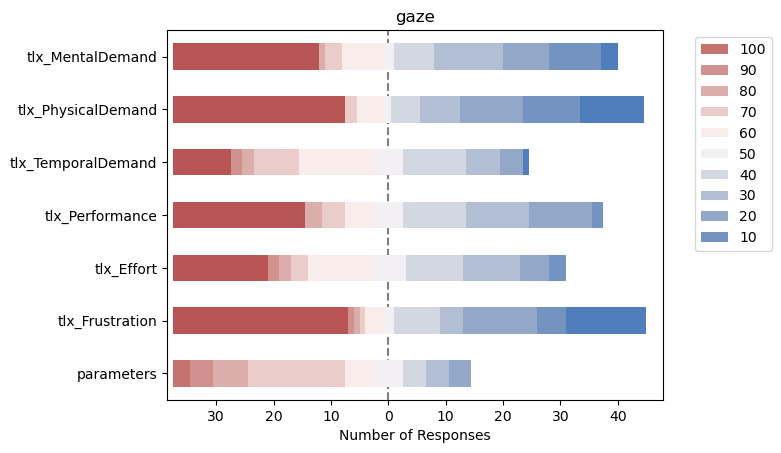

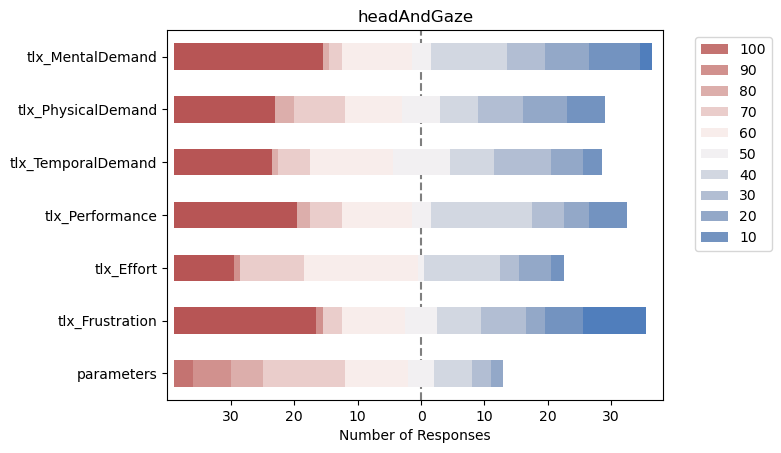

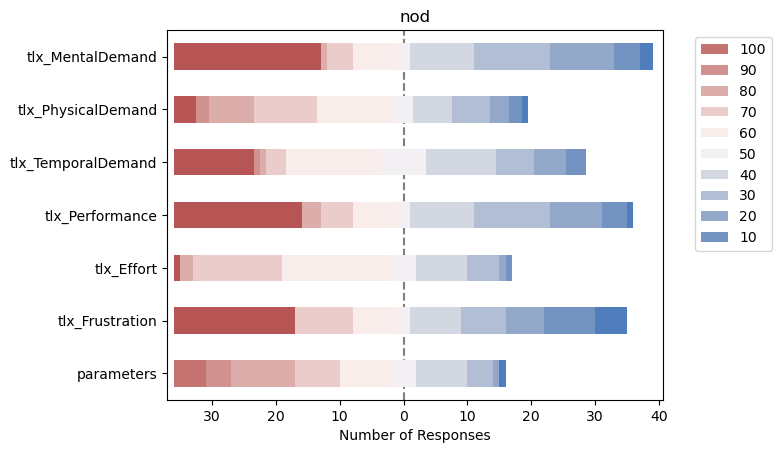

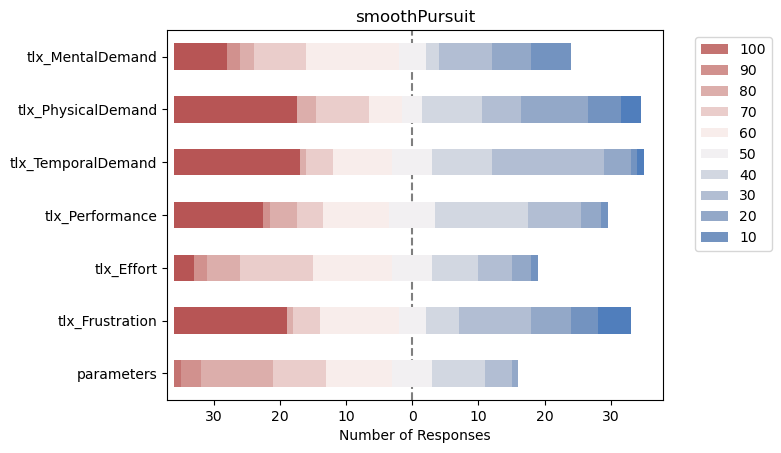

In [3]:
from plot_likert import plot_likert
import matplotlib.pyplot as plt
import seaborn as sns
for condition in Recording.conditions:
    answers = recs.get_answers(condition)# , simulate_answers=False)
    plot_likert(answers, [x*10 for x in range(11)][::-1], colors=sns.color_palette("vlag_r", 12))
    plt.title(condition)
    plt.show()

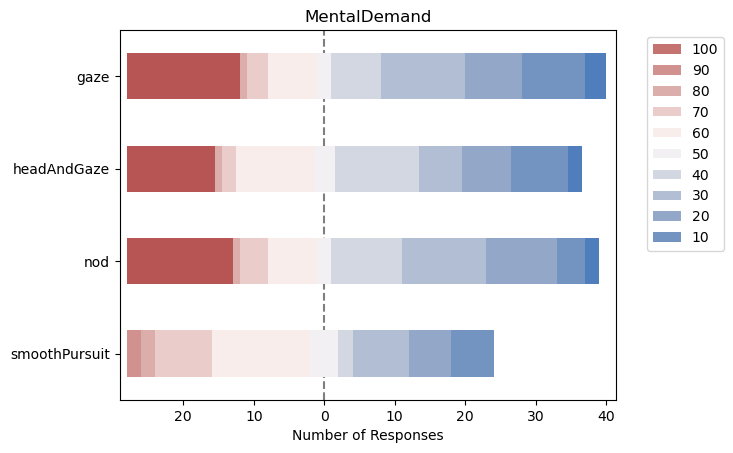

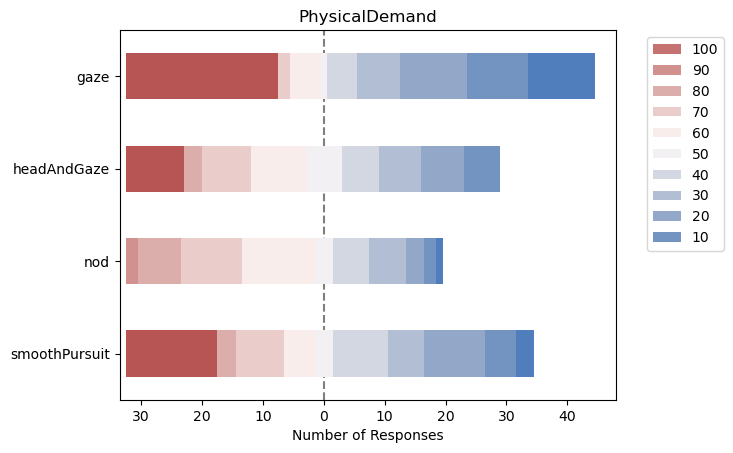

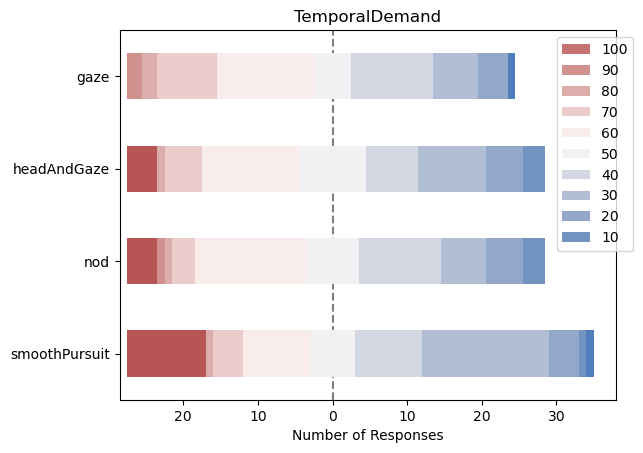

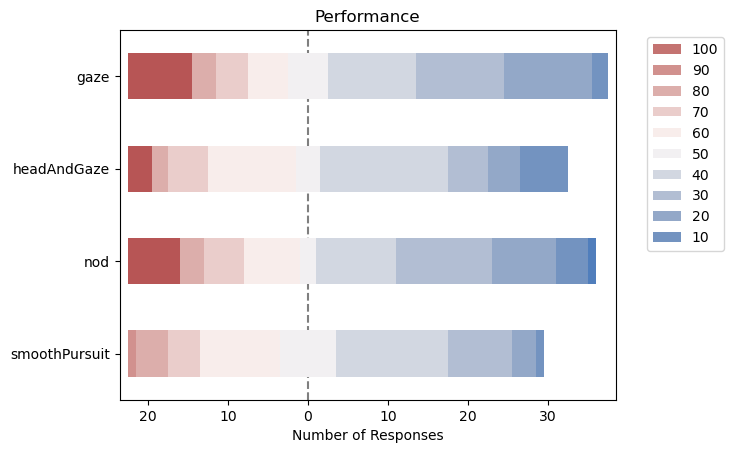

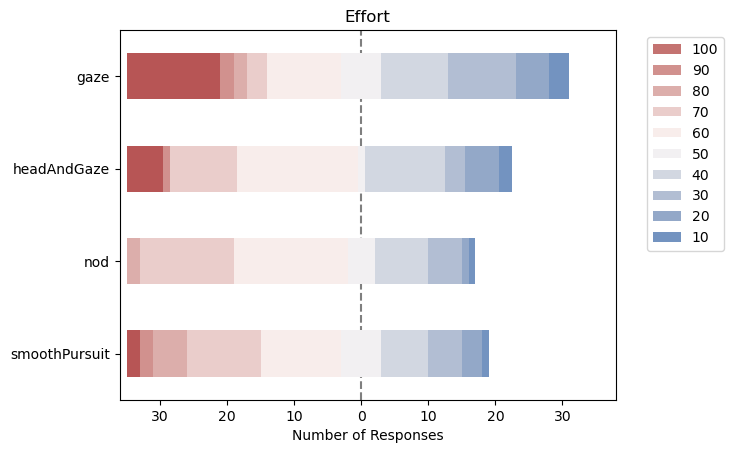

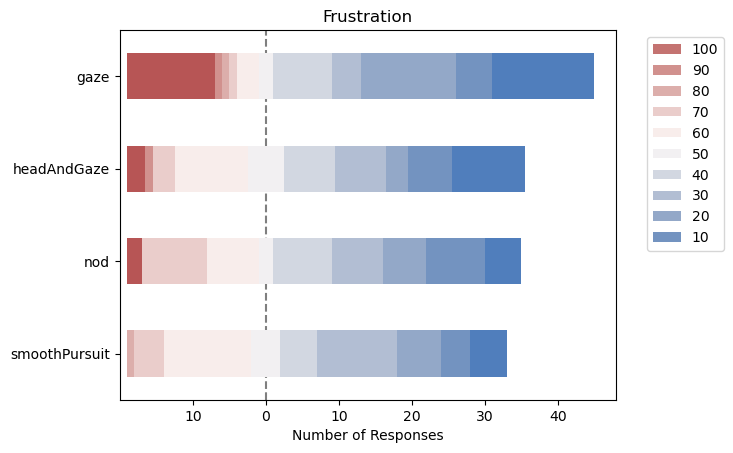

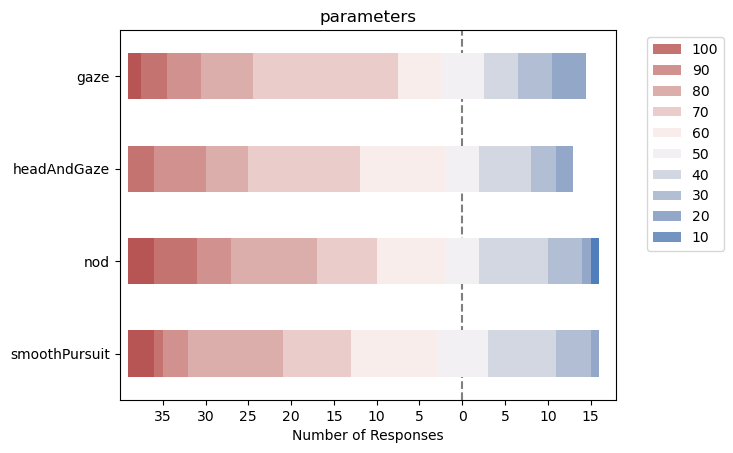

In [4]:
from plot_likert import plot_likert
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import utils
use_z_score = False
answers = recs.get_all_answers(use_z_score=use_z_score)
questions = list(answers[Recording.conditions[0]].keys())
for question in questions:
    summary = dict()
    for cond in Recording.conditions:
        summary[cond] = answers[cond][question]
    plot_likert(pd.DataFrame(summary), [x*10 for x in range(11)][::-1], colors=sns.color_palette("vlag_r", 12))
    plt.title(question.replace("tlx_", ""))

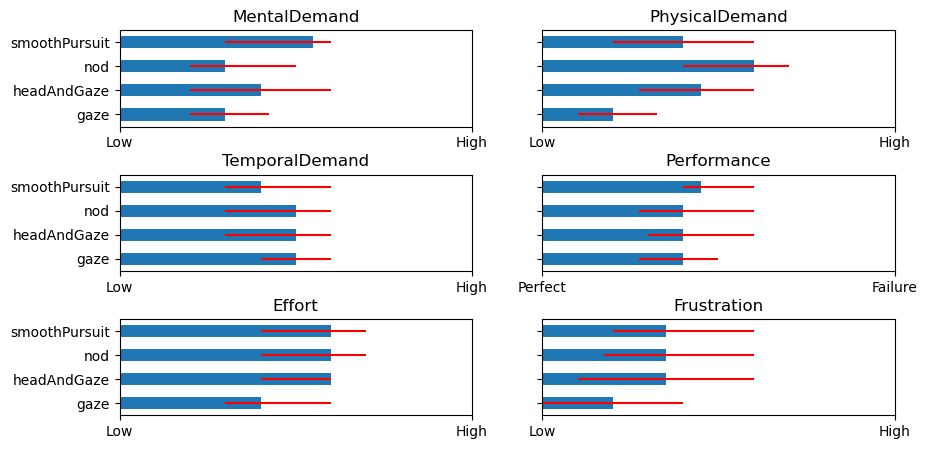

In [5]:
import numpy as np
import pandas as pd
import utils


def calculate_iqr(x):
    q75, q25 = np.percentile(x, [75, 25])
    return q75-q25

use_z_score = False
skip_questions = ["parameters"]
answers = recs.get_all_answers(use_z_score=use_z_score)


summary = dict()
for cond in answers:
    summary[cond] = dict()
    summary[f"{cond}_std"] = dict()
    summary[f"{cond}_25p"] = dict()
    summary[f"{cond}_75p"] = dict()
    for q in answers[cond]:
        if q in skip_questions:
            continue
        summary[cond][q] = np.median(answers[cond][q])  # np.mean(answers[cond][q]) # 
        summary[f"{cond}_std"][q] = calculate_iqr(answers[cond][q])  #  np.std(answers[cond][q])
        summary[f"{cond}_25p"][q] = np.percentile(answers[cond][q], 25)
        summary[f"{cond}_75p"][q] = np.percentile(answers[cond][q], 75)
summary = pd.DataFrame(summary)
_, axs = plt.subplots(int(len(summary)/2), 2, sharey=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
i = 0

# start_color = np.array([8, 171, 29]) / 255
# end_color = np.array([179, 19, 19]) / 255
# grad_color = end_color - start_color
# color_scaling = lambda x: 1 / (1 + (x / (1-x))**(-2))

def get_color(x):
    start = np.array([0, 1, 0])
    end = np.array([1, 0, 0])
    diff = end - start
    return start + x/100 * diff


for question, row in summary.iterrows():
    row[Recording.conditions].plot(
        kind="barh",
        title=question.replace("tlx_", ""),
        # xerr=row[[f"{x}_std" for x in Recording.conditions]],
        # color=[start_color + color_scaling(x/100) * grad_color for x in row[Recording.conditions]],
        # color = [get_color(x) for x in row[Recording.conditions]],
        ax=axs[i]
    )
    axs[i].errorbar(
        row[Recording.conditions], 
        Recording.conditions,
        xerr=np.array([row[Recording.conditions].to_numpy()-row[[f"{x}_25p" for x in Recording.conditions]].to_numpy(),
                       row[[f"{x}_75p" for x in Recording.conditions]].to_numpy()-row[Recording.conditions].to_numpy()]),
        color="red",
        ls="none")
    q = question.replace("tlx_", "")
    axs[i].set_xlim([0, 100])
    if q == "Performance":
        if use_z_score: 
            axs[i].set_xticks([-3, 3], ["Perfect", "Failure"])
        else:
            axs[i].set_xticks([0, 100], ["Perfect", "Failure"])
    else:
        if use_z_score:
            axs[i].set_xticks([-3, 3], ["Low", "High"])
        else:
            axs[i].set_xticks([0, 100], ["Low", "High"])
    # axs[i].set_ylabel(question.replace('tlx_', ''))
    i+=1
plt.savefig("Pictures/QuestionsAnswers.png")
plt.show()

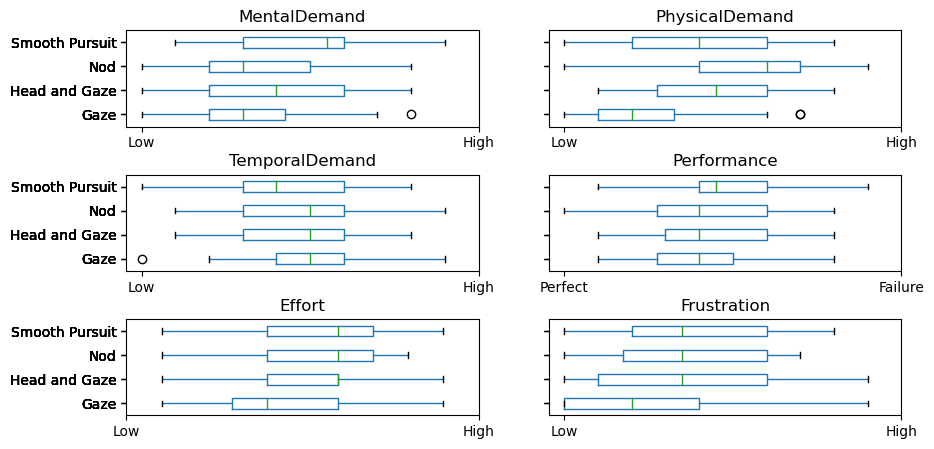

In [59]:
gender = False
answers = recs.get_all_answers(use_z_score=False, gender=gender)
questions = list(answers["gaze"].keys())
fig, axs = plt.subplots(int((len(questions)-1)/2), 2, sharey=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
summary_answers = dict()
for q in questions:
    if q in skip_questions:
        continue
    summary_answers[q] = dict()
    for c in Recording.conditions:
        summary_answers[q][rename_methods[c]] = answers[c][q]
i=0
for k in summary_answers:
    pd.DataFrame(summary_answers[k]).boxplot(vert=False, ax=axs[i],
                                             grid=False)
    q = k.replace("tlx_", "")
    axs[i].set_title(q)
    if q == "Performance":
        axs[i].set_xticks([0, 100], ["Perfect", "Failure"])
    else:
        axs[i].set_xticks([0, 100], ["Low", "High"])
    i+=1
title = f"{gender}" if gender else "All"
# fig.suptitle(title)
savepath = f"Pictures/QuestionsAnswers_box_{gender}.png" if gender else "Pictures/QuestionsAnswers_box.jpg"
plt.savefig(savepath, dpi=500)
plt.show()

In [7]:
summary_answers[k].keys()
k

'tlx_Frustration'

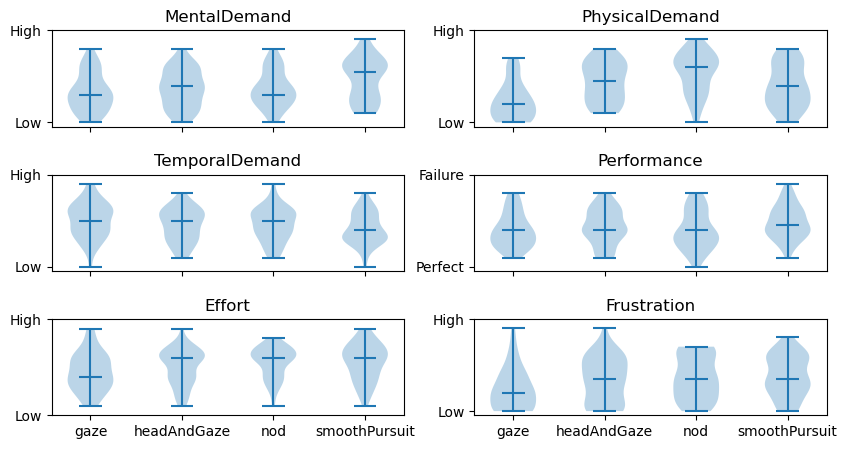

In [8]:
questions = list(answers["gaze"].keys())
_, axs = plt.subplots(int((len(questions)-1)/2), 2, sharex=True, figsize=(10,5), gridspec_kw={'hspace': 0.5})
axs = axs.flatten()
summary_answers = dict()
for q in questions:
    if q in skip_questions:
        continue
    summary_answers[q] = dict()
    for c in Recording.conditions:
        summary_answers[q][c] = answers[c][q]
i=0
for k in summary_answers:
    # pd.DataFrame(summary_answers[k]).violinplot(vert=False, ax=axs[i])
    axs[i].violinplot([summary_answers[k][x] for x in summary_answers[k]], vert=True,
                      showmeans=False,
                      showmedians=True,
                      showextrema=True,
                      # quantiles=[[0.25, .5, 0.75] for _ in range(len(summary_answers[k]))]
                      )
    axs[i].set_xticks([1, 2, 3, 4], list(summary_answers[k].keys()))
    q = k.replace("tlx_", "")
    axs[i].set_title(q)
    if q == "Performance":
        axs[i].set_yticks([0, 100], ["Perfect", "Failure"])
    else:
        axs[i].set_yticks([0, 100], ["Low", "High"])
    i+=1
plt.savefig("Pictures/QuestionsAnswers_box.png")
plt.show()

In [9]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")
answers = recs.get_all_answers(use_z_score=use_z_score)
res = list()
questions = ['tlx_MentalDemand', 'tlx_PhysicalDemand', 'tlx_TemporalDemand', 'tlx_Performance', 'tlx_Effort', 'tlx_Frustration']
for q in questions:
    values = list()
    v, g = list(), list()
    for cond in Recording.conditions:
        values.append(answers[cond][q])
        v.extend(answers[cond][q])
        g.extend([cond]*len(answers[cond][q]))
    f_value, p_value = stats.kruskal(*values)
    # tukeyhsd = pairwise_tukeyhsd(v, g)
    # print(tukeyhsd)
    pvalues_wilkox = sp.posthoc_mannwhitney(pd.DataFrame({
        "Values": v,
        "Groups": g 
        }), val_col="Values", group_col="Groups") #, p_adjust="bonferroni")
    print("="*80)
    print(" "*30, q)
    print("="*80)
    display(pvalues_wilkox)
    new_res = {
        "Question": q.replace('tlx_', ''),
        "H value": f_value,
        "p value": p_value
    }
    for cond in Recording.conditions:
        new_res[f"{cond}_median"] = np.median(answers[cond][q])
        new_res[f"{cond}_std"] = np.std(answers[cond][q])
    res.append(new_res)
print("="*80)
print(" "*30, "Kruskal")
print("="*80)
pd.DataFrame(res)

                               tlx_MentalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.279003,0.327807,0.002860
headAndGaze,0.279003,1.000000,0.835616,0.023367
nod,0.327807,0.835616,1.000000,0.023859
smoothPursuit,0.002860,0.023367,0.023859,1.000000


                               tlx_PhysicalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000e+00,0.000007,2.725330e-09,0.000495
headAndGaze,7.052140e-06,1.000000,2.099799e-02,0.310933
nod,2.725330e-09,0.020998,1.000000e+00,0.002098
smoothPursuit,4.947209e-04,0.310933,2.098427e-03,1.000000


                               tlx_TemporalDemand


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.144862,0.190330,0.012106
headAndGaze,0.144862,1.000000,0.889592,0.293175
nod,0.190330,0.889592,1.000000,0.198463
smoothPursuit,0.012106,0.293175,0.198463,1.000000


                               tlx_Performance


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.279164,0.939554,0.017155
headAndGaze,0.279164,1.000000,0.280814,0.274486
nod,0.939554,0.280814,1.000000,0.022418
smoothPursuit,0.017155,0.274486,0.022418,1.000000


                               tlx_Effort


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.096463,0.003056,0.007005
headAndGaze,0.096463,1.000000,0.172797,0.185679
nod,0.003056,0.172797,1.000000,0.915424
smoothPursuit,0.007005,0.185679,0.915424,1.000000


                               tlx_Frustration


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.040748,0.009734,0.001843
headAndGaze,0.040748,1.000000,0.544025,0.387431
nod,0.009734,0.544025,1.000000,0.765174
smoothPursuit,0.001843,0.387431,0.765174,1.000000


                               Kruskal


,Question,H value,p value,gaze_median,gaze_std,headAndGaze_median,headAndGaze_std,nod_median,nod_std,smoothPursuit_median,smoothPursuit_std
0,MentalDemand,10.693734,1.350267e-02,30.0,20.485960,40.0,20.259960,30.0,19.330511,55.0,22.999871
1,PhysicalDemand,41.805638,4.411817e-09,20.0,20.275470,45.0,21.595906,60.0,22.036649,40.0,23.274793
2,TemporalDemand,6.502203,8.957568e-02,50.0,19.156588,50.0,17.813133,50.0,18.117793,40.0,17.027649
3,Performance,7.257335,6.413258e-02,40.0,18.708287,40.0,19.287417,40.0,20.521132,45.0,17.836992
4,Effort,11.307998,1.017184e-02,40.0,19.758153,60.0,18.343977,60.0,15.872085,60.0,19.063697
5,Frustration,10.917160,1.218236e-02,20.0,22.481913,35.0,24.428376,35.0,23.464691,35.0,22.043361


In [10]:
res_df = pd.DataFrame(res)
print(res_df[["Question", "H value", "p value"]].round(3).to_latex(index=False))

\begin{tabular}{lrr}
\toprule
Question & H value & p value \\
\midrule
MentalDemand & 10.694000 & 0.014000 \\
PhysicalDemand & 41.806000 & 0.000000 \\
TemporalDemand & 6.502000 & 0.090000 \\
Performance & 7.257000 & 0.064000 \\
Effort & 11.308000 & 0.010000 \\
Frustration & 10.917000 & 0.012000 \\
\bottomrule
\end{tabular}



In [11]:
from scipy import stats
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings("ignore")


answers = recs.get_all_answers(use_z_score=use_z_score)

answers_male = recs.get_all_answers(gender="Male")
answers_female = recs.get_all_answers(gender="Female")
res = list()
questions = ['tlx_MentalDemand', 'tlx_PhysicalDemand', 'tlx_TemporalDemand', 'tlx_Performance', 'tlx_Effort', 'tlx_Frustration']
for q in questions:
    for cond in Recording.conditions:
        test = stats.mannwhitneyu(answers_male[cond][q], answers_female[cond][q])
        res.append({
            "Question": q.replace("tlx_", ""),
            "Method": rename_methods[cond],
            "Statistic": test.statistic,
            "pValue": test.pvalue,
            "Value": f"{test.statistic:.1f} ({test.pvalue:.3f})"
        })
res = pd.DataFrame(res)
multi_test = multipletests(res.pValue.to_numpy(), method="bonferroni")
# res["pValueCorrected"] = multi_test.pvals_corrected
print(multi_test[1])
display(res)

res_wide = res.pivot(index="Method", columns="Question", values="Value")
res_wide = res_wide[["MentalDemand", "PhysicalDemand", "TemporalDemand", "Performance", "Effort", "Frustration"]]
res_wide.columns = ["Mental", "Physical", "Temporal", "Performance", "Effort", "Frustration"]
display(res_wide)
print(res_wide.to_latex())


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.64716311 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


,Question,Method,Statistic,pValue,Value
0,MentalDemand,Gaze,298.5,0.837803,298.5 (0.838)
1,MentalDemand,Head and Gaze,300.0,0.813466,300.0 (0.813)
2,MentalDemand,Nod,326.5,0.434848,326.5 (0.435)
3,MentalDemand,Smooth Pursuit,305.0,0.734704,305.0 (0.735)
4,PhysicalDemand,Gaze,345.0,0.246124,345.0 (0.246)
5,PhysicalDemand,Head and Gaze,302.5,0.775224,302.5 (0.775)
6,PhysicalDemand,Nod,267.0,0.674768,267.0 (0.675)
7,PhysicalDemand,Smooth Pursuit,343.5,0.261249,343.5 (0.261)
8,TemporalDemand,Gaze,313.5,0.607568,313.5 (0.608)
9,TemporalDemand,Head and Gaze,320.0,0.518673,320.0 (0.519)


,Mental,Physical,Temporal,Performance,Effort,Frustration
Method,,,,,,
Gaze,298.5 (0.838),345.0 (0.246),313.5 (0.608),211.0 (0.117),305.5 (0.728),302.0 (0.781)
Head and Gaze,300.0 (0.813),302.5 (0.775),320.0 (0.519),180.5 (0.027),291.0 (0.958),245.0 (0.385)
Nod,326.5 (0.435),267.0 (0.675),326.0 (0.440),231.0 (0.247),312.5 (0.618),281.5 (0.903)
Smooth Pursuit,305.0 (0.735),343.5 (0.261),316.0 (0.568),292.0 (0.943),314.5 (0.595),260.5 (0.581)


\begin{tabular}{lllllll}
\toprule
 & Mental & Physical & Temporal & Performance & Effort & Frustration \\
Method &  &  &  &  &  &  \\
\midrule
Gaze & 298.5 (0.838) & 345.0 (0.246) & 313.5 (0.608) & 211.0 (0.117) & 305.5 (0.728) & 302.0 (0.781) \\
Head and Gaze & 300.0 (0.813) & 302.5 (0.775) & 320.0 (0.519) & 180.5 (0.027) & 291.0 (0.958) & 245.0 (0.385) \\
Nod & 326.5 (0.435) & 267.0 (0.675) & 326.0 (0.440) & 231.0 (0.247) & 312.5 (0.618) & 281.5 (0.903) \\
Smooth Pursuit & 305.0 (0.735) & 343.5 (0.261) & 316.0 (0.568) & 292.0 (0.943) & 314.5 (0.595) & 260.5 (0.581) \\
\bottomrule
\end{tabular}



In [12]:
import scikit_posthocs as sp

df = pd.DataFrame({"Values": v, "Groups": g})
sp.posthoc_wilcoxon(df, val_col="Values", group_col="Groups")

,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000,0.001287,0.000727,0.000175
headAndGaze,0.001287,1.000000,0.461899,0.143553
nod,0.000727,0.461899,1.000000,0.617736
smoothPursuit,0.000175,0.143553,0.617736,1.000000


In [13]:
recs.calc_events()

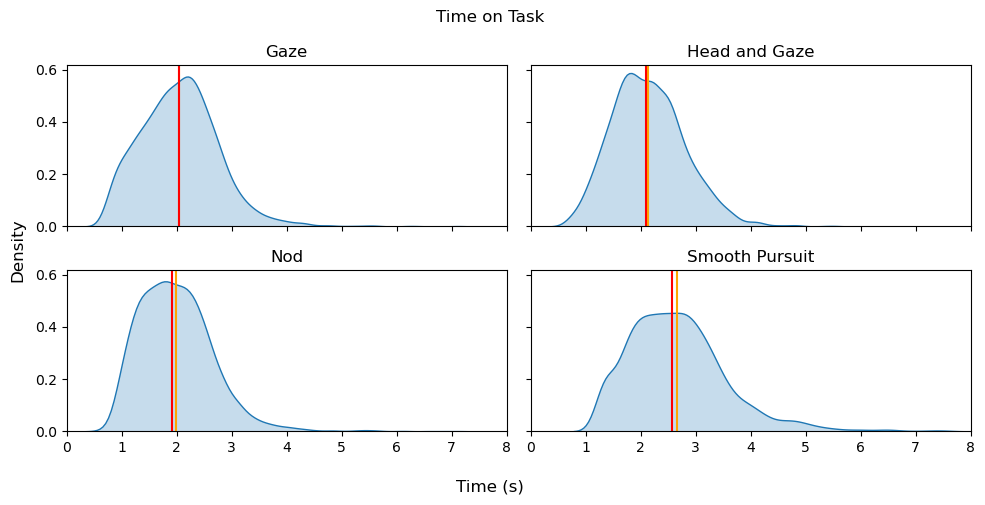

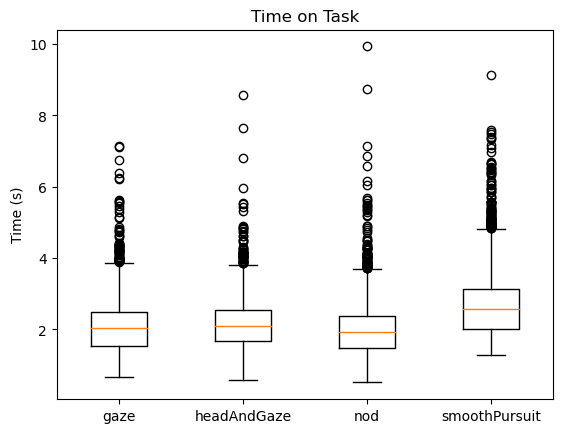

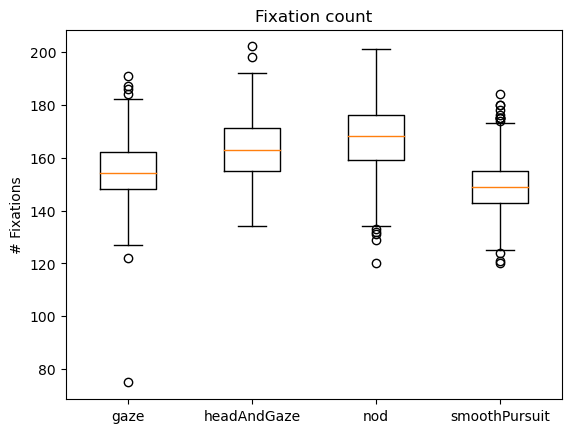

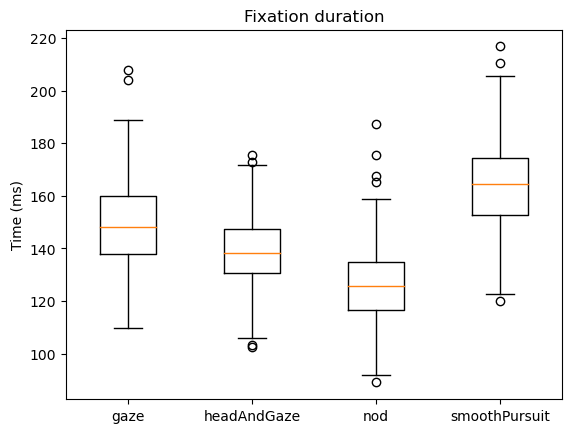

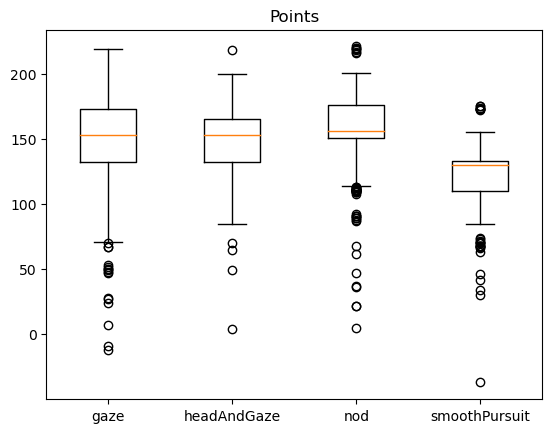

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
gender = False
fig, axs_temp = plt.subplots(2, 2, figsize=(10,5), sharex=True, sharey=True)
axs = [axs_temp[0,0], axs_temp[0, 1], axs_temp[1, 0], axs_temp[1, 1]]
all_time_on_tasks = dict()
all_fixation_count = dict()
all_fixation_duration = dict()
all_points = dict()
summary = dict()
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition, gender=gender)
    time_on_task = list()
    correct = 0
    incorrect = 0
    points = list()
    fixation_count = list()
    fixation_duration = list()
    for player in round_results:
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task += [x for x in res["TimeOnTask"] if x < 10]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
            fixation_count.append(res["FixationCount"])
            fixation_duration.append(res["MeanFixationDuration"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i])
    axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    # axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
    axs[i].set_title(rename_methods[condition])
    axs[i].set_ylabel("")
    axs[i].set_xlim([0, 8])
    all_time_on_tasks[condition] = time_on_task
    all_fixation_count[condition] = fixation_count
    all_fixation_duration[condition] = fixation_duration
    all_points[condition] = points
    summary[rename_methods[condition]] = {
        "Mean Time": np.mean(time_on_task),
        "Std Time": np.std(time_on_task),
        # "Median Time": np.median(time_on_task),
        # "Correct": correct,
        "Incorrect": incorrect,
        "Mean Points": np.mean(points),
        "Std Points": np.std(points)
        # "Median Points": np.median(points)
    }
title = f"Time on Task {gender}" if gender else "Time on Task"
fig.suptitle(title)
fig.supxlabel("Time (s)")
fig.supylabel("Density")
fig.tight_layout()
savepath = f"Pictures/TimeOnTask{gender}.png" if gender else "Pictures/TimeOnTask.png"
plt.savefig(savepath, dpi=500)
plt.show()

def create_boxplot(d, title, ylabel):
    _, ax = plt.subplots()
    ax.boxplot(d.values())
    ax.set_xticklabels(d.keys())
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

create_boxplot(all_time_on_tasks, "Time on Task", "Time (s)")
create_boxplot(all_fixation_count, "Fixation count", "# Fixations")
create_boxplot(all_fixation_duration, "Fixation duration", "Time (ms)")
create_boxplot(all_points, "Points", "")

In [15]:
from scipy import stats
import scikit_posthocs as sp
print(stats.kruskal(all_points["gaze"], all_points["headAndGaze"], all_points["nod"], all_points["smoothPursuit"]))
test_results_df = sp.posthoc_mannwhitney(pd.DataFrame({
    "Values": np.concatenate([all_points[x] for x in Recording.conditions]),
    "Groups": np.concatenate([[x] * len(all_points[x]) for x in Recording.conditions])
    }), val_col="Values", group_col="Groups", p_adjust="bonferroni")
display(test_results_df)
display(test_results_df < 0.001)


KruskalResult(statistic=550.3017491070874, pvalue=5.97752019447784e-119)


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000e+00,1.000000e+00,1.883911e-15,2.059112e-50
headAndGaze,1.000000e+00,1.000000e+00,3.181472e-15,4.999175e-64
nod,1.883911e-15,3.181472e-15,1.000000e+00,4.255890e-100
smoothPursuit,2.059112e-50,4.999175e-64,4.255890e-100,1.000000e+00


,gaze,headAndGaze,nod,smoothPursuit
gaze,False,False,True,True
headAndGaze,False,False,True,True
nod,True,True,False,True
smoothPursuit,True,True,True,False


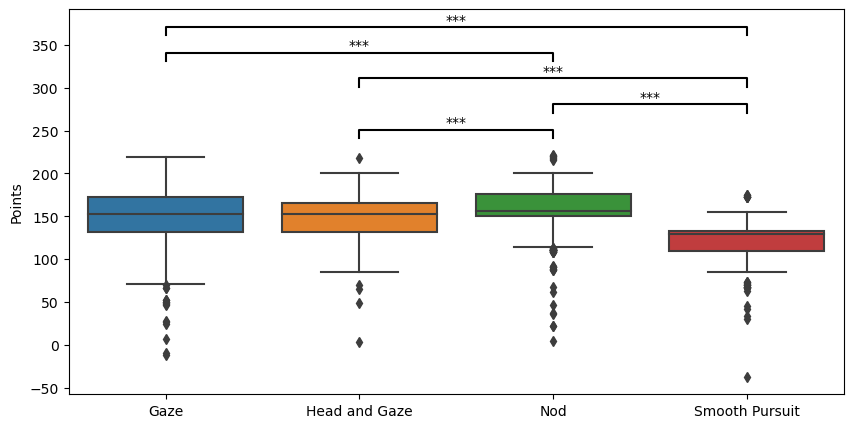

In [55]:
import seaborn as sns

violinplot = False
fig, ax = plt.subplots(figsize=(10, 5))
if violinplot:
    sns.violinplot([all_points[x] for x in all_points])
else:
    sns.boxplot([all_points[x] for x in all_points], ax=ax)
methods = {rename_methods[x]: i for i, x in enumerate(list(all_points.keys()))}
plt.xticks([methods[x] for x in methods], methods)
max_values = {x: np.max(all_points[x]) for x in all_points}
max_value = np.max([max_values[x] for x in max_values])
sig_different = [
    ["headAndGaze", "nod"], 
    ["nod", "smoothPursuit"], 
    ["headAndGaze", "smoothPursuit"],
    ["gaze", "nod"],
    ["gaze", "smoothPursuit"], 
]

for i, (m1, m2) in enumerate(sig_different):
    y = max_value
    h = 10
    x1 = methods[rename_methods[m1]]
    x2 = methods[rename_methods[m2]]
    y1 = y + i*h + (i+1)*20
    y2 = y + (1+i) * h + (i+1)*20
    ax.plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, c='k')
    ax.text((x1 + x2) * 0.5, y2, "***", ha='center', va='bottom', color='k')

# fig.supxlabel("Method")
# fig.supylabel("Points")
ax.set_ylabel("Points")
savepath = "Pictures/Points_box.png" if not violinplot else "Pictures/Points_violin.png"
plt.savefig(savepath, dpi=500)
plt.show()

In [17]:
temp_data = {
    "Values": np.concatenate([all_points[x] for x in Recording.conditions]),
    "Groups": np.concatenate([[x] * len(all_points[x]) for x in Recording.conditions])
}
pd.DataFrame(temp_data)

,Values,Groups
0,130,gaze
1,156,gaze
2,88,gaze
3,153,gaze
4,151,gaze
...,...,...
2171,129,smoothPursuit
2172,109,smoothPursuit
2173,130,smoothPursuit
2174,115,smoothPursuit


In [18]:
summary_df = pd.DataFrame(summary).transpose()
summary_df["Incorrect"] = summary_df["Incorrect"].astype(int)
summary_df = summary_df.round(3)
display(summary_df)
print(summary_df.to_latex())

,Mean Time,Std Time,Incorrect,Mean Points,Std Points
Gaze,2.049,0.716,171,144.626,32.131
Head and Gaze,2.137,0.678,73,147.737,25.573
Nod,1.985,0.691,114,159.578,29.265
Smooth Pursuit,2.665,0.905,21,122.810,23.150


\begin{tabular}{lrrrrr}
\toprule
 & Mean Time & Std Time & Incorrect & Mean Points & Std Points \\
\midrule
Gaze & 2.049000 & 0.716000 & 171 & 144.626000 & 32.131000 \\
Head and Gaze & 2.137000 & 0.678000 & 73 & 147.737000 & 25.573000 \\
Nod & 1.985000 & 0.691000 & 114 & 159.578000 & 29.265000 \\
Smooth Pursuit & 2.665000 & 0.905000 & 21 & 122.810000 & 23.150000 \\
\bottomrule
\end{tabular}



In [19]:
all_time_on_tasks.values()

dict_values([[2.620900000000006, 2.3984000000000094, 1.443399999999997, 2.8297000000000025, 2.2561999999999784, 2.509299999999996, 2.7871999999999844, 2.7094000000000165, 1.2434000000000083, 3.4314999999999714, 2.4431000000000154, 1.061300000000017, 0.9701999999999771, 2.165300000000002, 2.6317999999999984, 3.0090999999999894, 1.0766000000000417, 1.7767000000000053, 2.2314999999999827, 1.1326999999999998, 2.8202, 3.775700000000029, 3.0538999999999987, 2.0541000000000054, 2.2765999999999735, 3.9752000000000294, 1.6655000000000086, 3.3093999999999824, 2.109800000000007, 2.0319000000000074, 2.320600000000013, 2.3582000000000107, 2.7607999999999606, 1.5033999999999992, 1.7058000000000106, 2.265199999999993, 1.7210000000000036, 2.3654000000000224, 2.7758999999999787, 0.9771000000000072, 3.1533999999999764, 2.0652000000000044, 2.6428999999999974, 2.887100000000032, 2.5874000000000024, 1.6433000000000106, 3.2982000000000085, 2.3432999999999993, 2.2425999999999817, 0.9768000000000256, 1.954299

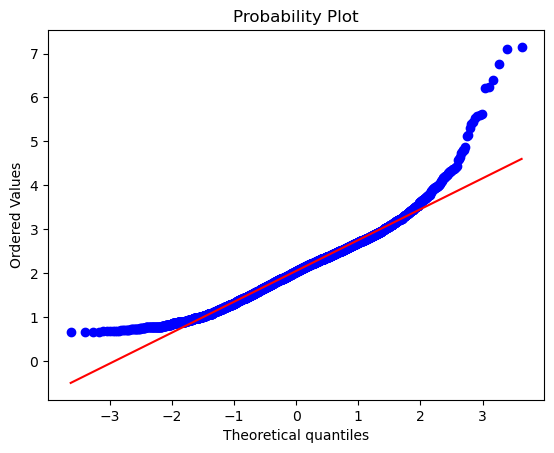

gaze KstestResult(statistic=0.029553463328519936, pvalue=0.00039227574527756675, statistic_location=2.520999999999958, statistic_sign=1)


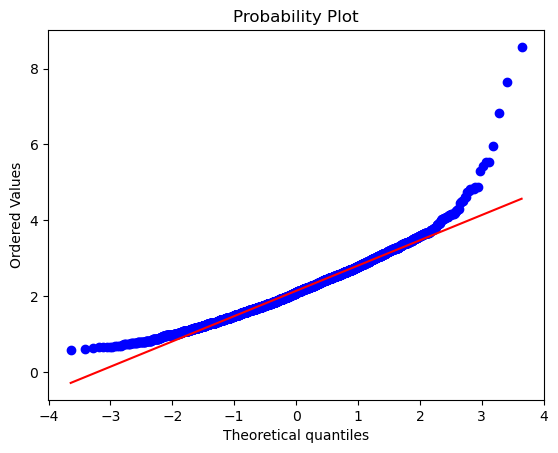

headAndGaze KstestResult(statistic=0.03814123491071347, pvalue=6.490895208306141e-07, statistic_location=1.9770000000003165, statistic_sign=1)


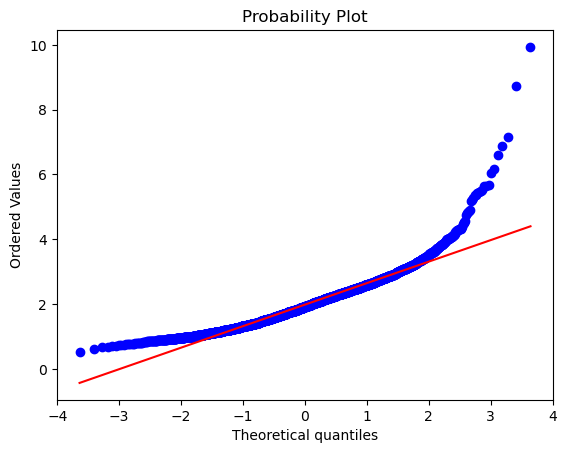

nod KstestResult(statistic=0.048197754493526666, pvalue=1.0181398297057677e-10, statistic_location=0.931999999999789, statistic_sign=-1)


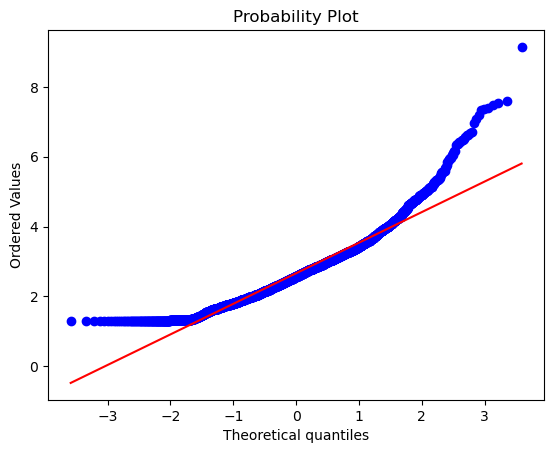

smoothPursuit KstestResult(statistic=0.06393089729418852, pvalue=3.0218145498646867e-15, statistic_location=1.2870000000000346, statistic_sign=-1)


gaze headAndGaze LeveneResult(statistic=8.20444519969487, pvalue=0.0041874908962826795)
gaze nod LeveneResult(statistic=12.425839904642508, pvalue=0.0004253346753409415)
gaze smoothPursuit LeveneResult(statistic=133.56800099836155, pvalue=1.1151995789831898e-30)
headAndGaze nod LeveneResult(statistic=0.631084332775129, pvalue=0.42697630734919945)
headAndGaze smoothPursuit LeveneResult(statistic=206.5700193559015, pvalue=2.4125083787735974e-46)
nod smoothPursuit LeveneResult(statistic=212.85744547192104, pvalue=1.1037162087951107e-47)


In [20]:
from scipy import stats
for c in Recording.conditions:
    stats.probplot(all_time_on_tasks[c], plot=plt)
    ks_test = stats.kstest(all_time_on_tasks[c], "norm", args=(np.mean(all_time_on_tasks[c]), np.std(all_time_on_tasks[c])))
    plt.show()
    print(c, ks_test)

print()
print()

for i in range(len(Recording.conditions)):
    for j in range(i+1, len(Recording.conditions)):
        cond_i = Recording.conditions[i]
        cond_j = Recording.conditions[j]
        print(cond_i, cond_j, stats.levene(all_time_on_tasks[cond_i], all_time_on_tasks[cond_j]))

In [21]:
import numpy as np
from scipy.stats import f_oneway, kruskal
from scikit_posthocs import posthoc_ttest, posthoc_mannwhitney
anova = f_oneway(all_time_on_tasks["gaze"], all_time_on_tasks["headAndGaze"], all_time_on_tasks["nod"], all_time_on_tasks["smoothPursuit"])
print('ANOVA', anova)
krusk = kruskal(all_time_on_tasks["gaze"], all_time_on_tasks["headAndGaze"], all_time_on_tasks["nod"], all_time_on_tasks["smoothPursuit"])
print('Kruskal', krusk)
# x = [all_time_on_tasks[x] for x in Recording.conditions]
# g = [[x] * len(all_time_on_tasks[x]) for x in Recording.conditions]
# posthoc_tukey_hsd(
#     np.concatenate(x),
#     np.concatenate(g)
# )
# x = pd.DataFrame(all_time_on_tasks)
# x

ttest_df = posthoc_mannwhitney([all_time_on_tasks[x] for x in Recording.conditions], p_adjust="bonferroni")
ttest_df.index = Recording.conditions
ttest_df.columns = Recording.conditions
ttest_df

ANOVA F_onewayResult(statistic=759.1731809207929, pvalue=0.0)
Kruskal KruskalResult(statistic=1803.8644469016592, pvalue=0.0)


,gaze,headAndGaze,nod,smoothPursuit
gaze,1.000000e+00,3.286831e-09,5.847757e-08,8.521118e-247
headAndGaze,3.286831e-09,1.000000e+00,9.451296e-36,1.455672e-190
nod,5.847757e-08,9.451296e-36,1.000000e+00,0.000000e+00
smoothPursuit,8.521118e-247,1.455672e-190,0.000000e+00,1.000000e+00


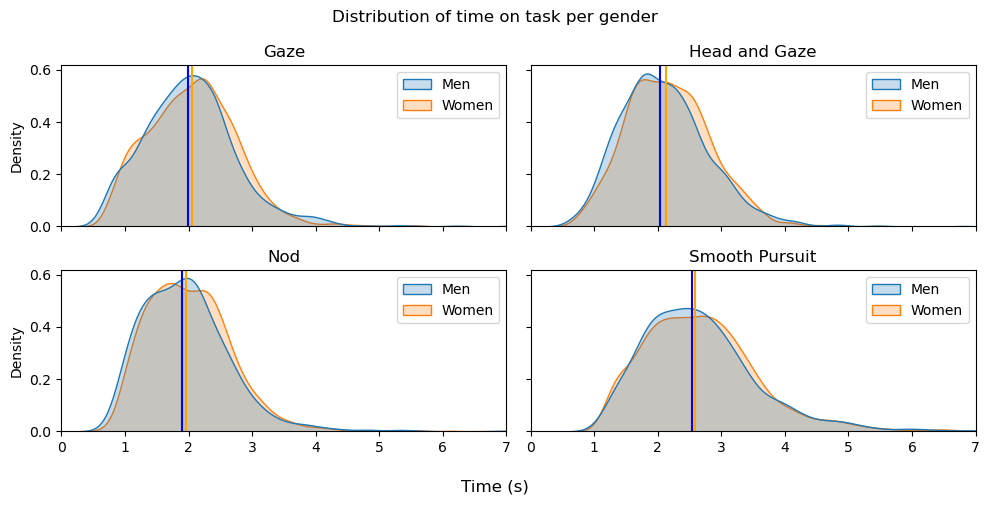

,Method,test_value,p_value,ks_value,ks_p_value,Mean_male,Median_male,Std_male,Nobs_male,Mean_female,Median_female,Std_female,Nobs_female
0,gaze,2427180.5,0.016778,0.049543,0.009481,2.030786,1.9986,0.749060,1693,2.060396,2.0617,0.697538,2993
1,headAndGaze,2551422.0,0.000059,0.059150,0.000784,2.102892,2.0320,0.696512,1700,2.170337,2.1319,0.675300,3226
2,nod,2574466.5,0.000310,0.060500,0.000509,1.957570,1.8970,0.722464,1749,2.012115,1.9540,0.679389,3139
3,smoothPursuit,1778198.0,0.333903,0.036944,0.163771,2.663647,2.5428,0.928184,1382,2.674316,2.5870,0.905218,2622


,Method,t_time,p_time,t_points,p_points,t_incorrects,p_incorrects
0,gaze,2427180.5,0.016778,-0.288485,0.772976,0.012751,0.989827
1,headAndGaze,2551422.0,0.000059,0.844900,0.398167,0.521388,0.602096
2,nod,2574466.5,0.000310,0.810342,0.417744,1.396834,0.162463
3,smoothPursuit,1778198.0,0.333903,0.844085,0.398622,0.816711,0.414094


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import ttest_ind, ranksums
from scipy import stats
res = list()
res_stats = list()
fig, axs = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
translate_gender = {
    "Men": "Male",
    "Women": "Female"
}
for i, cond in enumerate(Recording.conditions):
    summary_rounds = {"Women": recs.get_summarized_rounds(cond, "Female"),
                      "Men": recs.get_summarized_rounds(cond, "Male")}
    timeOnTask = {"Men": list(), "Women": list()}
    points = {"Men": list(), "Women": list()}
    incorrects = {"Men": list(), "Women": list()}
    for g in ["Men", "Women"]:
        for p in summary_rounds[g]:
            for r in summary_rounds[g][p]:
                timeOnTask[g] += [x for x in summary_rounds[g][p][r]["TimeOnTask"] if x < 10]
                points[g].append(summary_rounds[g][p][r]["Points"])
                incorrects[g].append(summary_rounds[g][p][r]["Incorrect"])
    
    test_time = stats.mannwhitneyu(timeOnTask["Men"], timeOnTask["Women"])
    ks_time = stats.ks_2samp(timeOnTask["Men"], timeOnTask["Women"])
    ttest_points = stats.ranksums(points["Men"], points["Women"])
    ttest_incorrects = stats.ranksums(incorrects["Men"], incorrects["Women"])
    sns.kdeplot(timeOnTask, fill=True, multiple="layer", common_norm=False, ax=axs[i])
    axs[i].axvline(np.median(timeOnTask["Men"]), c="blue")
    axs[i].axvline(np.median(timeOnTask["Women"]), c="orange")
    axs[i].set_title(rename_methods[cond])
    axs[i].set_xlim([0, 7])
    # fig, (ax_time, ax_points, ax_incorrect) = plt.subplots(3)
    # sns.kdeplot(timeOnTask, fill=True, multiple="layer", common_norm=False, ax=ax_time)
    # ax_time.set_title("Time on Task")
    # sns.kdeplot(points, fill=True, multiple="layer", common_norm=False, ax=ax_points)
    # ax_points.set_title("Points")
    # sns.kdeplot(incorrects, fill=True, multiple="layer", common_norm=False, ax=ax_incorrect)
    # ax_incorrect.set_title("Incorrects")
    # fig.suptitle(cond)
    # fig.tight_layout()
    # plt.show()
    res.append({
        "Method": cond,
        "t_time": test_time.statistic,
        "p_time": test_time.pvalue,
        "t_points": ttest_points.statistic,
        "p_points": ttest_points.pvalue,
        "t_incorrects": ttest_incorrects.statistic,
        "p_incorrects": ttest_incorrects.pvalue 
    })
    res_stats.append({
        "Method": cond,
        "test_value": test_time.statistic,
        "p_value": test_time.pvalue,
        "ks_value": ks_time.statistic,
        "ks_p_value": ks_time.pvalue,
        "Mean_male": np.mean(timeOnTask["Men"]),
        "Median_male": np.median(timeOnTask["Men"]),
        "Std_male": np.std(timeOnTask["Men"]),
        "Nobs_male": len(timeOnTask["Men"]),
        "Mean_female": np.mean(timeOnTask["Women"]),
        "Median_female": np.median(timeOnTask["Women"]),
        "Std_female": np.std(timeOnTask["Women"]),
        "Nobs_female": len(timeOnTask["Women"])
    })
fig.suptitle("Distribution of time on task per gender")
fig.supxlabel("Time (s)")
fig.tight_layout()
plt.savefig("Pictures/timeGender.png", dpi=500)
plt.show()
display(pd.DataFrame(res_stats))
display(pd.DataFrame(res))

In [23]:
from scipy import stats
import pandas as pd

# gender points difference

gender_points = {x: {"Male": list(), "Female": list()} for x in Recording.conditions}
gender_incorrect = {x: {"Male": list(), "Female": list()} for x in Recording.conditions}
gender_round_count = {"Male": 0, "Female": 0}
for cond in Recording.conditions:
    for rec in recs:
        if rec.gender in ["Male", "Female"]:
            final_rounds = rec.get_final_rounds(cond)
            points = final_rounds["Points"].to_list()
            gender_points[cond][rec.gender] += points
            incorrects = final_rounds["IncorrectDestroyed"].to_list()
            gender_incorrect[cond][rec.gender] += incorrects
            gender_round_count[rec.gender] += len(final_rounds)

 
gender_count = {"Male": 0, "Female": 0}           
for rec in recs:
    if rec.gender in ["Male", "Female"]:
        gender_count[rec.gender] += 1

gender_timeOnTask = {x: {"Male": list(), "Female": list()} for x in Recording.conditions}
for cond in Recording.conditions:
    for gender in ["Male", "Female"]:
        summarized_rounds = recs.get_summarized_rounds(cond, gender)
        for pat in summarized_rounds:
            for r in summarized_rounds[pat]:
                gender_timeOnTask[cond][gender] += summarized_rounds[pat][r]["TimeOnTask"]

test_results = dict()
summary_points_gender = dict()
for cond in Recording.conditions:
    male = gender_points[cond]["Male"]
    female = gender_points[cond]["Female"]
    male_incorrect = gender_incorrect[cond]["Male"]
    female_incorrect = gender_incorrect[cond]["Female"]
    ttest = stats.ttest_ind(male, female)
    summary_points_gender[rename_methods[cond]] = {
        "Male points": np.mean(male),
        # "Std_male": np.std(male),
        "Male time": np.mean(gender_timeOnTask[cond]["Male"]),
        "Male failures": np.sum(male_incorrect)/gender_round_count["Male"],
        "Female points": np.mean(female),
        # "Std_female": np.std(female),
        "Female time": np.mean(gender_timeOnTask[cond]["Female"]),
        "Female failures": np.sum(female_incorrect)/gender_round_count["Female"]
    }

    points_test = stats.mannwhitneyu(male, female)
    time_test = stats.mannwhitneyu(gender_timeOnTask[cond]["Male"], gender_timeOnTask[cond]["Female"])
    incorrect_test = stats.mannwhitneyu(male_incorrect, female_incorrect, alternative="greater")
    test_results[cond] = {
        "point_v": points_test.statistic,
        "point_p": points_test.pvalue,
        "time_v": time_test.statistic,
        "time_p": time_test.pvalue,
        "incorrect_v": incorrect_test.statistic,
        "incorrect_p": incorrect_test.pvalue
    }

df = pd.DataFrame(summary_points_gender).transpose()
display(df)


print(df.round(2).to_latex())

df_test = pd.DataFrame(test_results).transpose()
display(df_test)

,Male points,Male time,Male failures,Female points,Female time,Female failures
Gaze,144.232044,2.030786,0.076503,144.167183,2.063885,0.082845
Head and Gaze,148.467742,2.102892,0.039617,146.202216,2.170337,0.031525
Nod,159.377049,1.977036,0.076503,158.719403,2.025215,0.039589
Smooth Pursuit,121.697802,2.683655,0.019126,122.857971,2.674316,0.004399


\begin{tabular}{lrrrrrr}
\toprule
 & Male points & Male time & Male failures & Female points & Female time & Female failures \\
\midrule
Gaze & 144.230000 & 2.030000 & 0.080000 & 144.170000 & 2.060000 & 0.080000 \\
Head and Gaze & 148.470000 & 2.100000 & 0.040000 & 146.200000 & 2.170000 & 0.030000 \\
Nod & 159.380000 & 1.980000 & 0.080000 & 158.720000 & 2.030000 & 0.040000 \\
Smooth Pursuit & 121.700000 & 2.680000 & 0.020000 & 122.860000 & 2.670000 & 0.000000 \\
\bottomrule
\end{tabular}



,point_v,point_p,time_v,time_p,incorrect_v,incorrect_p
gaze,28779.0,0.773023,2427180.5,0.015957,29251.5,0.493326
headAndGaze,35052.5,0.397771,2551422.0,0.000059,34486.0,0.164472
nod,31972.0,0.417425,2580747.5,0.000330,32927.0,0.014986
smoothPursuit,32798.0,0.398175,1786064.0,0.394245,32752.5,0.003820


In [24]:
len(rec.get_final_rounds("nod"))

10

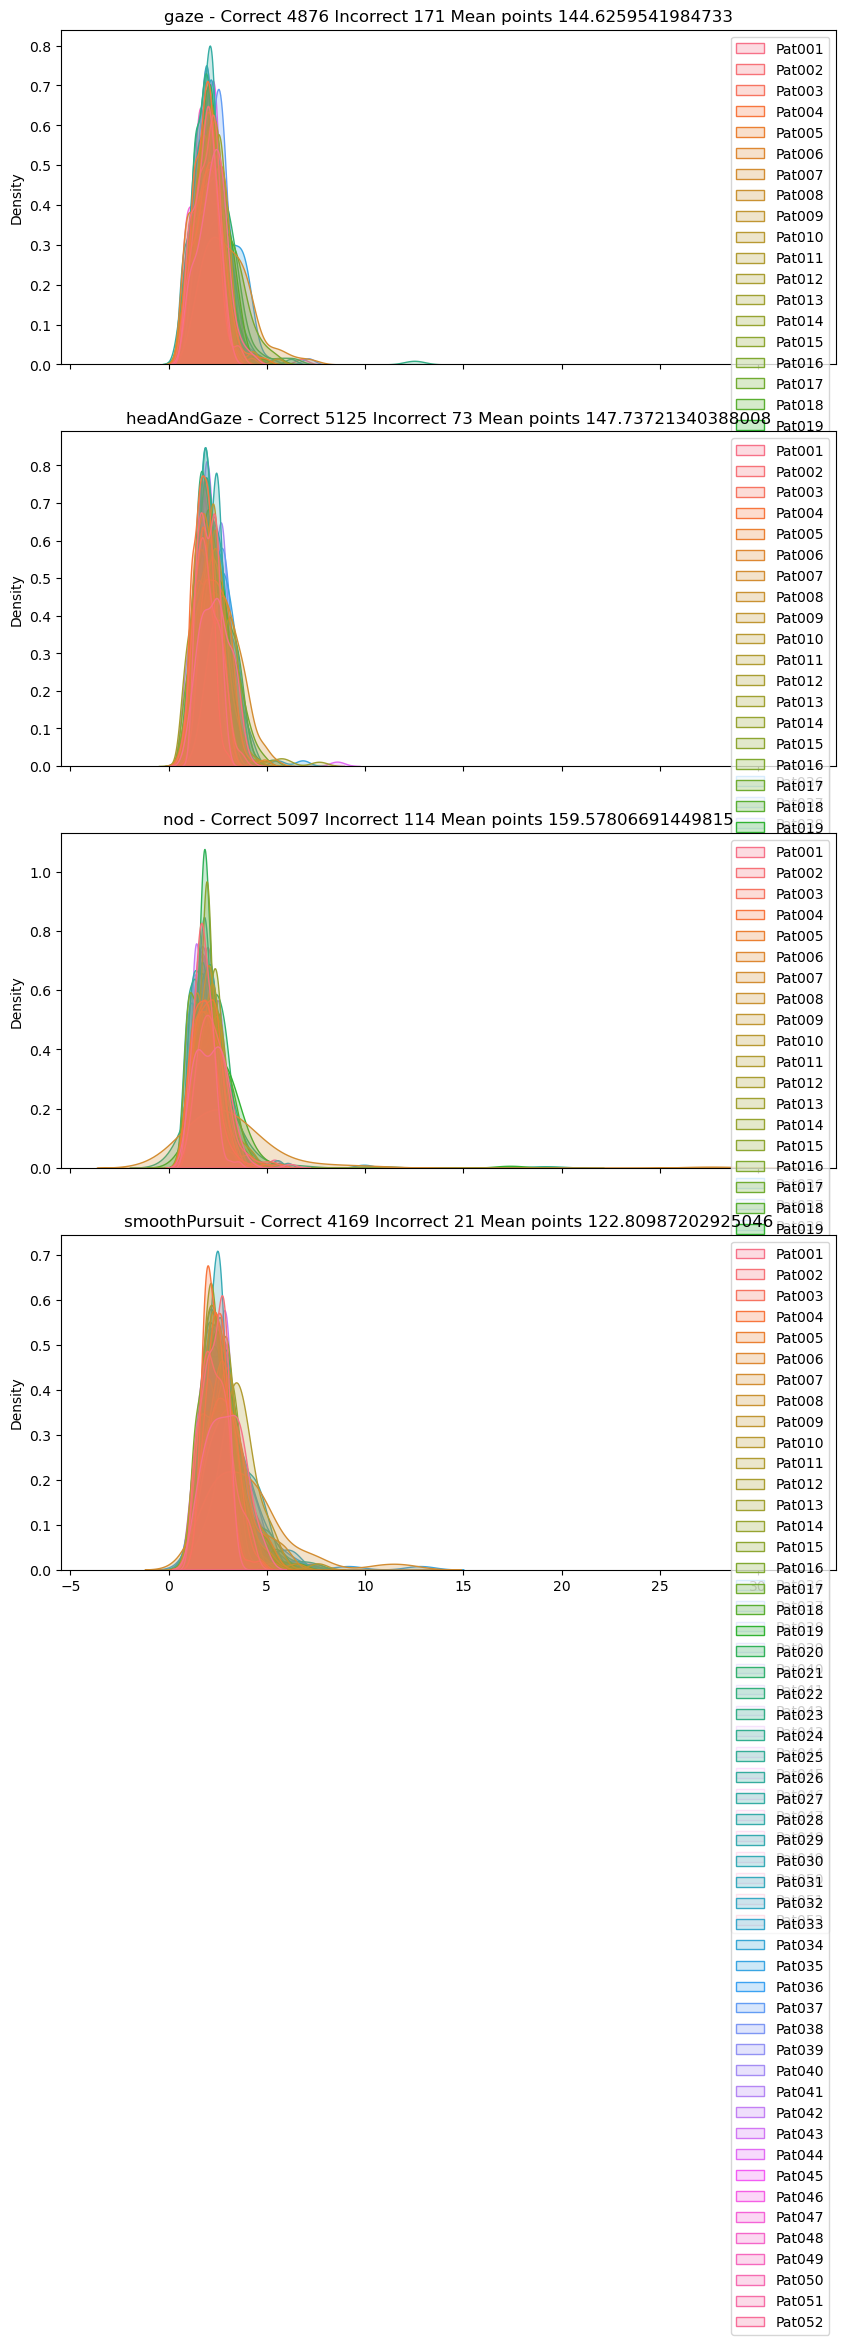

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(len(Recording.conditions), sharex=True, figsize=(10,20))
for i, condition in enumerate(Recording.conditions):
    round_results = recs.get_summarized_rounds(condition)
    time_on_task = dict()
    correct = 0
    incorrect = 0
    points = list()
    for player in round_results:
        time_on_task[player] = list()
        for round in round_results[player]:
            res = round_results[player][round]
            time_on_task[player] += res["TimeOnTask"]
            correct += res["Correct"]
            incorrect += res["Incorrect"]
            points.append(res["Points"])
    sns.kdeplot(time_on_task, fill=True, ax=axs[i], multiple="layer", common_norm=False)
    # axs[i].axvline(np.mean(time_on_task), 0, 1, color="orange")
    # axs[i].axvline(np.median(time_on_task), 0, 1, color="red")
    axs[i].set_title(f"{condition} - Correct {correct} Incorrect {incorrect} Mean points {np.mean(points)}")
plt.show()

In [26]:
condition = "headAndGaze"
paras = recs.get_final_parameters(condition)
paras["Incorrect"] = list()
for pat in paras["Participant"]:
    sum_rounds = recs[pat].summarize_rounds(condition)
    incorrect = 0
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
    paras["Incorrect"].append(incorrect)
pd.DataFrame(paras)

,HeadGazeCorrection,DwellTime,Participant,Incorrect
0,10,0.75,Pat001,0
1,20,0.60,Pat002,1
2,4,0.45,Pat003,0
3,6,0.35,Pat004,1
4,4,0.30,Pat005,8
5,16,0.80,Pat006,0
6,10,1.00,Pat007,0
7,12,0.40,Pat008,3
8,10,0.50,Pat009,2
9,10,0.40,Pat010,2


In [27]:
res = dict()
for rec in recs:
    fails = {c: 0 for c in Recording.conditions}
    fails["Total"] = 0
    for cond in Recording.conditions:
        sum_rounds = rec.summarize_rounds(cond)
        for k in sum_rounds:
            fails[cond] += sum_rounds[k]["Incorrect"]
            fails["Total"] += sum_rounds[k]["Incorrect"]
    res[rec.name] = fails
    res[rec.name]["Group"] = rec.group
pd.DataFrame(res).transpose().sort_values("Group")

,gaze,headAndGaze,nod,smoothPursuit,Total,Group
Pat020,1,1,1,0,3,1
Pat049,3,0,0,0,3,1
Pat048,0,0,1,0,1,1
Pat043,3,0,3,0,6,1
Pat030,5,0,2,0,7,1
Pat013,8,5,0,0,13,1
Pat018,0,8,6,0,14,2
Pat017,1,1,4,0,6,2
Pat004,2,1,2,0,5,2
Pat037,4,0,9,0,13,2


In [28]:
recs["Pat034"]

Recording of Pat034; Age 23; Gender Male; ET experience False; VR experience True; Visual Aid No; Preferred method Head and gaze.

# Regression based analysis of the influence of participant based features to the performance

In [29]:
round_results = {x: recs.get_summarized_rounds(x) for x in Recording.conditions}

In [30]:
round_results["gaze"]["Pat034"]

{4: {'Correct': 9,
  'Incorrect': 1,
  'Points': 131,
  'DwellTime': 0.6499999,
  'MeanTimeOnTask': 2.254111111111115,
  'StdTimeOnTask': 0.6103560280587534,
  'TimeOnTask': [3.09820000000002,
   3.1983000000000175,
   2.453899999999976,
   1.465599999999995,
   1.5432000000000698,
   2.6544000000000096,
   2.2092999999999847,
   2.009900000000016,
   1.6541999999999462],
  'FixationCount': 133,
  'MeanFixationDuration': 147.50375939849624},
 5: {'Correct': 9,
  'Incorrect': 0,
  'Points': 152,
  'DwellTime': 0.6499999,
  'MeanTimeOnTask': 2.296033333333336,
  'StdTimeOnTask': 0.6806250085195299,
  'TimeOnTask': [1.5097000000000662,
   3.12399999999991,
   2.9173000000000684,
   2.153799999999933,
   2.0434000000000196,
   3.0977000000000317,
   2.5983999999999696,
   2.2100000000000364,
   1.009999999999991],
  'FixationCount': 141,
  'MeanFixationDuration': 135.2340425531915},
 6: {'Correct': 9,
  'Incorrect': 0,
  'Points': 153,
  'DwellTime': 0.6499999,
  'MeanTimeOnTask': 2.226977

                               gaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Incorrect   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.62
Date:                Fri, 14 Feb 2025   Deviance:                       140.08
Time:                        13:37:18   Pearson chi2:                     151.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.6985
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

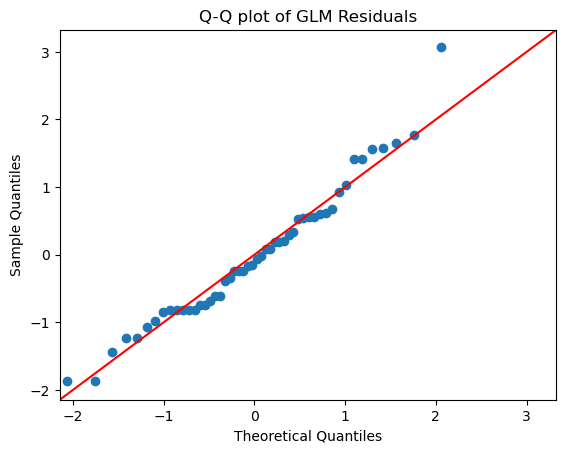

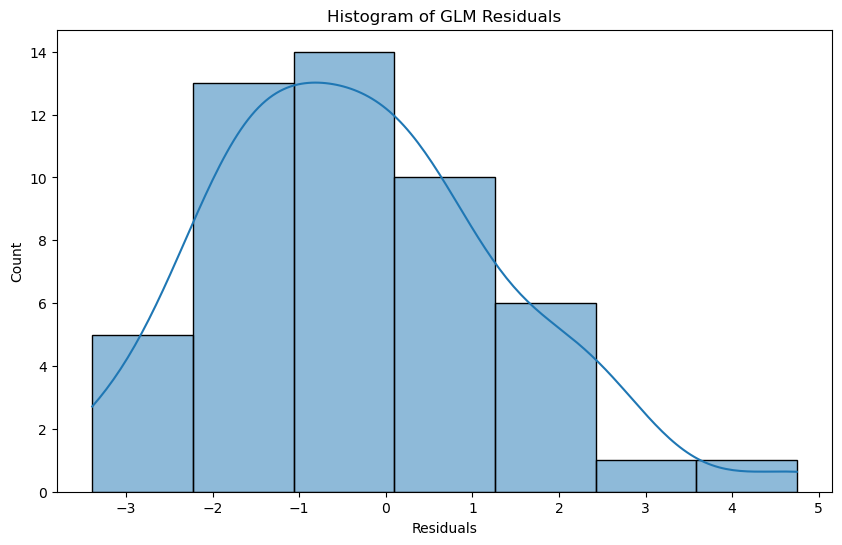

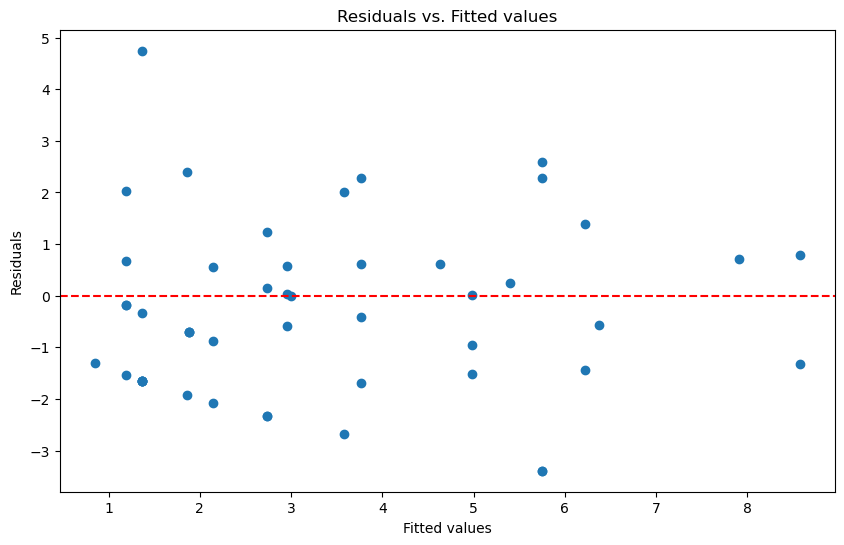

                               gaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Points   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.012959
Method:                          IRLS   Log-Likelihood:                -206.61
Date:                Fri, 14 Feb 2025   Deviance:                      0.54539
Time:                        13:37:19   Pearson chi2:                    0.518
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1309
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

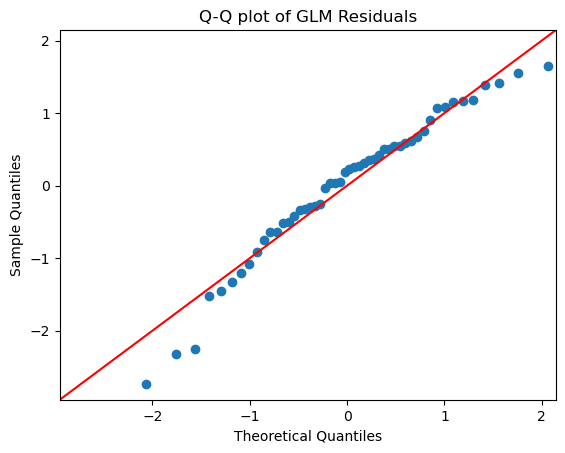

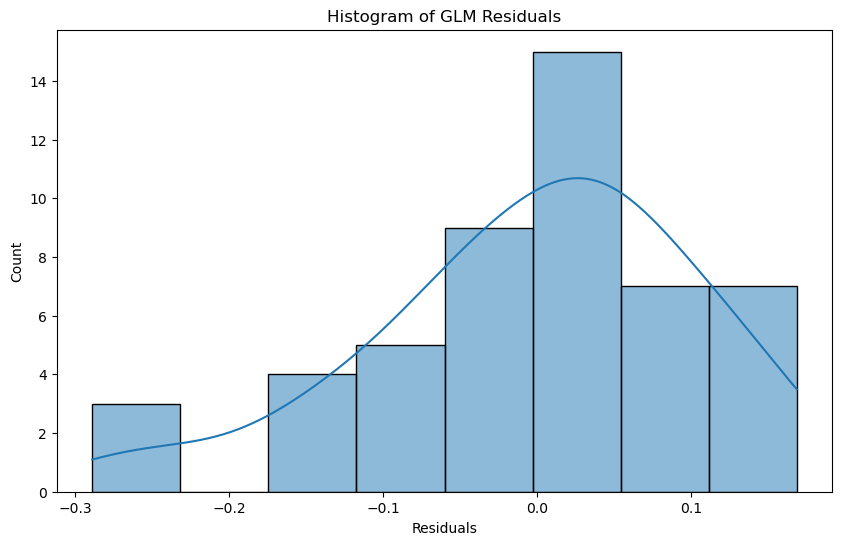

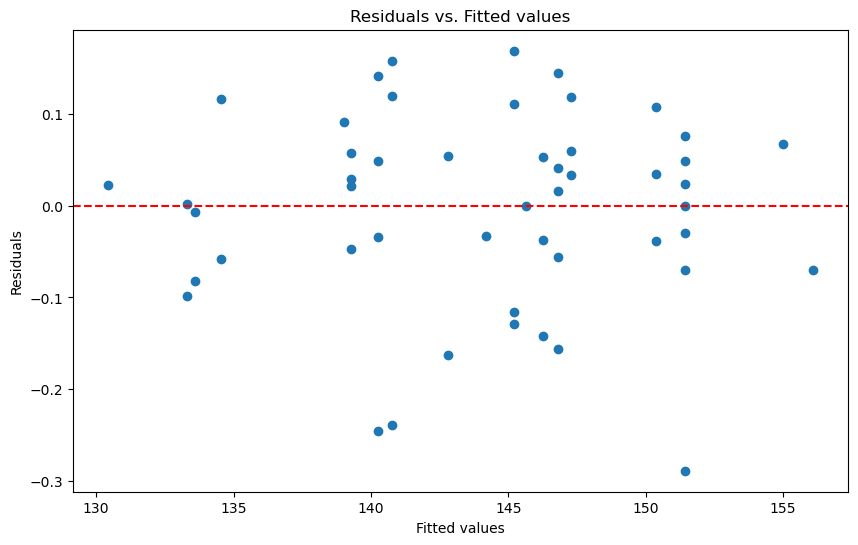

                               gaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:         MeanTimeOnTask   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.017502
Method:                          IRLS   Log-Likelihood:                0.37259
Date:                Fri, 14 Feb 2025   Deviance:                      0.63925
Time:                        13:37:20   Pearson chi2:                    0.700
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1262
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

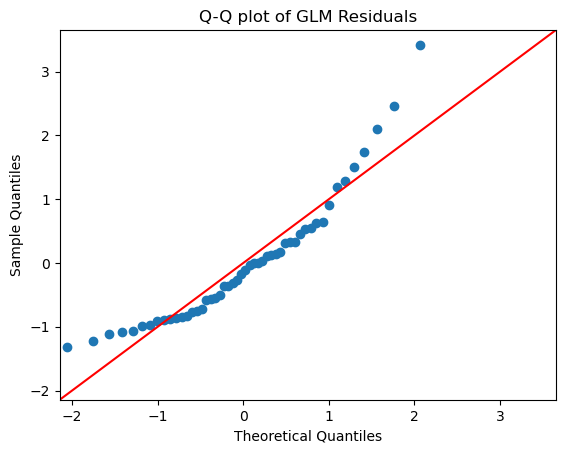

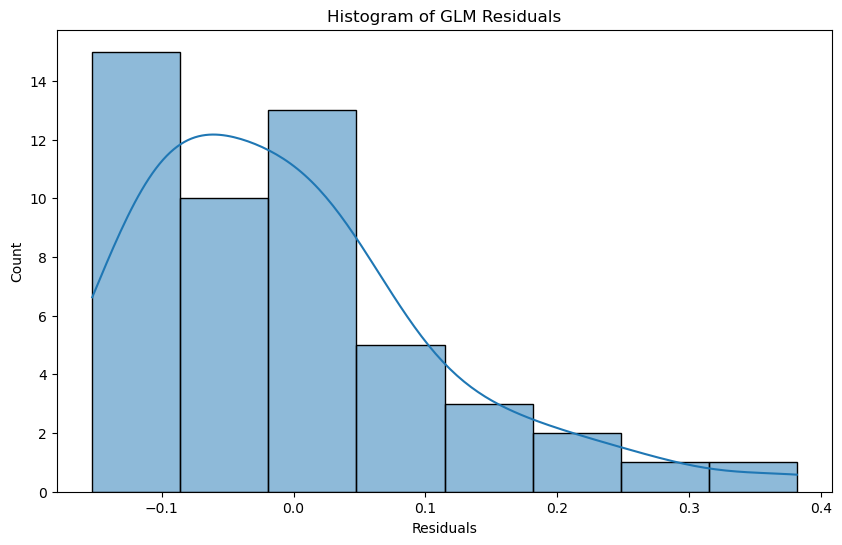

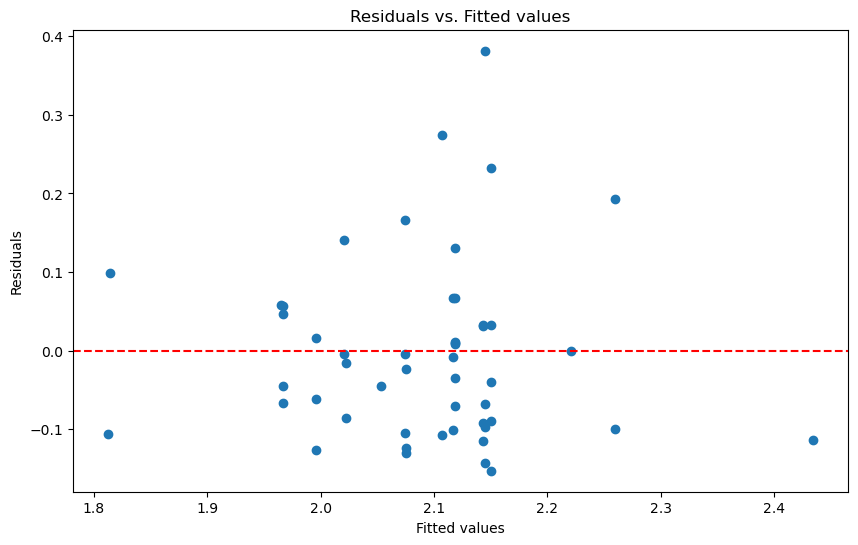

                               headAndGaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Incorrect   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93.820
Date:                Fri, 14 Feb 2025   Deviance:                       131.32
Time:                        13:37:20   Pearson chi2:                     167.
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6611
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

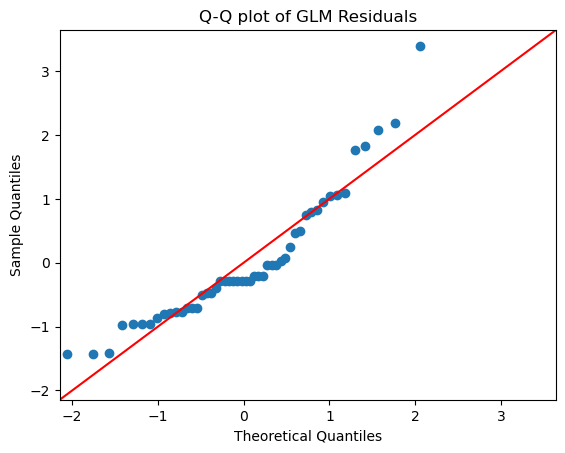

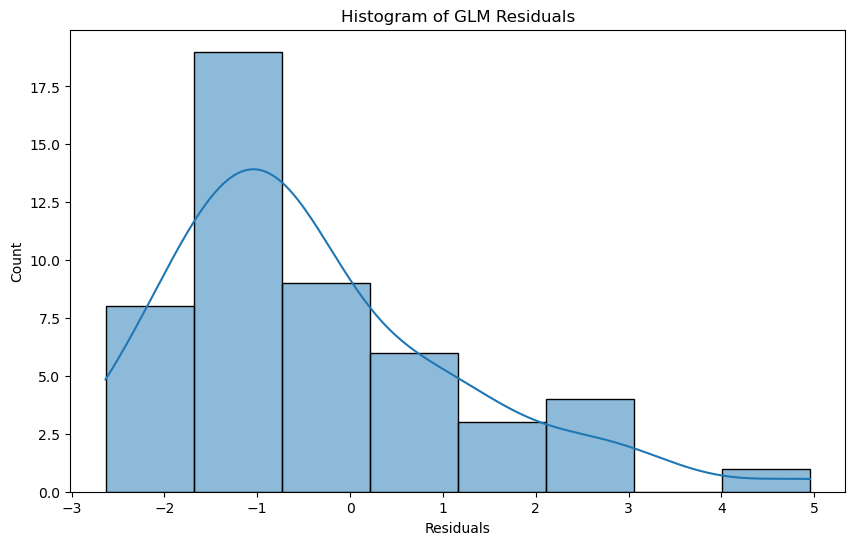

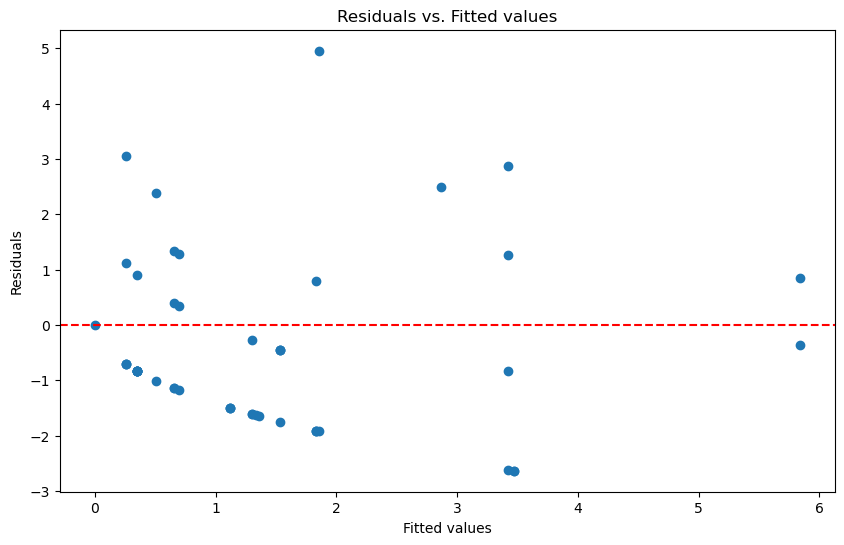

                               headAndGaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Points   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.013267
Method:                          IRLS   Log-Likelihood:                -207.95
Date:                Fri, 14 Feb 2025   Deviance:                      0.54669
Time:                        13:37:21   Pearson chi2:                    0.531
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2352
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

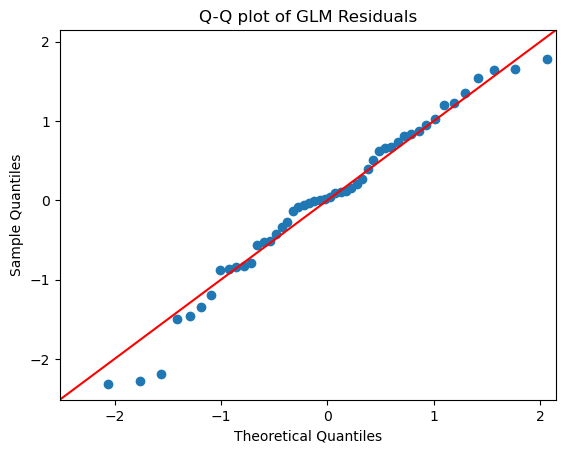

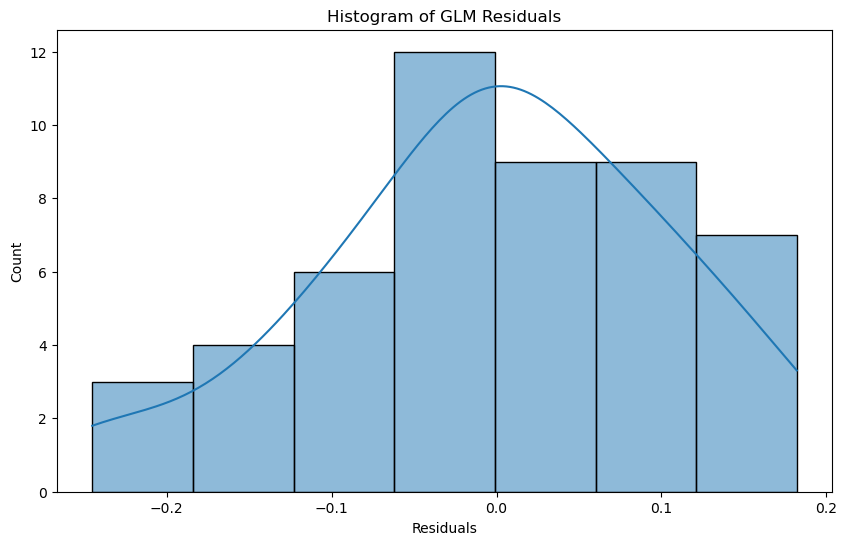

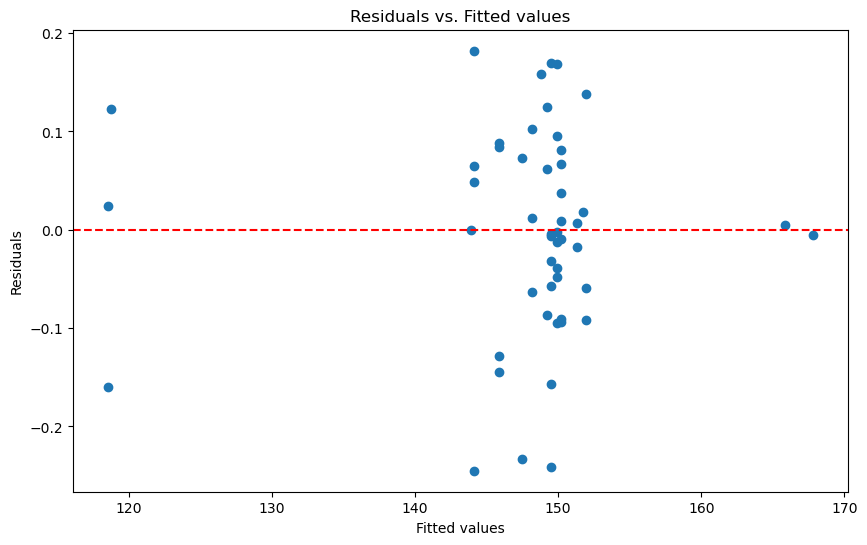

                               headAndGaze
                 Generalized Linear Model Regression Results                  
Dep. Variable:         MeanTimeOnTask   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.015947
Method:                          IRLS   Log-Likelihood:               -0.20186
Date:                Fri, 14 Feb 2025   Deviance:                      0.61557
Time:                        13:37:21   Pearson chi2:                    0.638
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1450
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

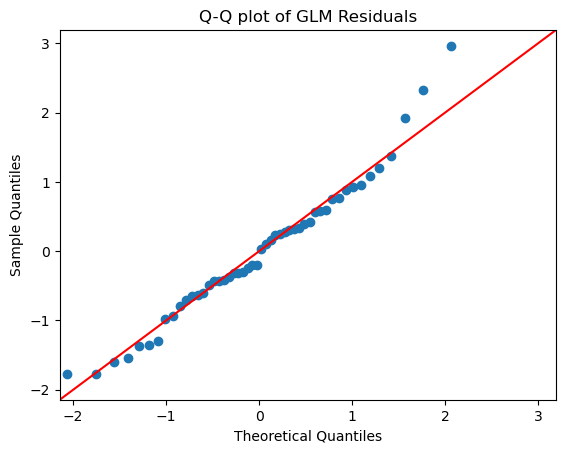

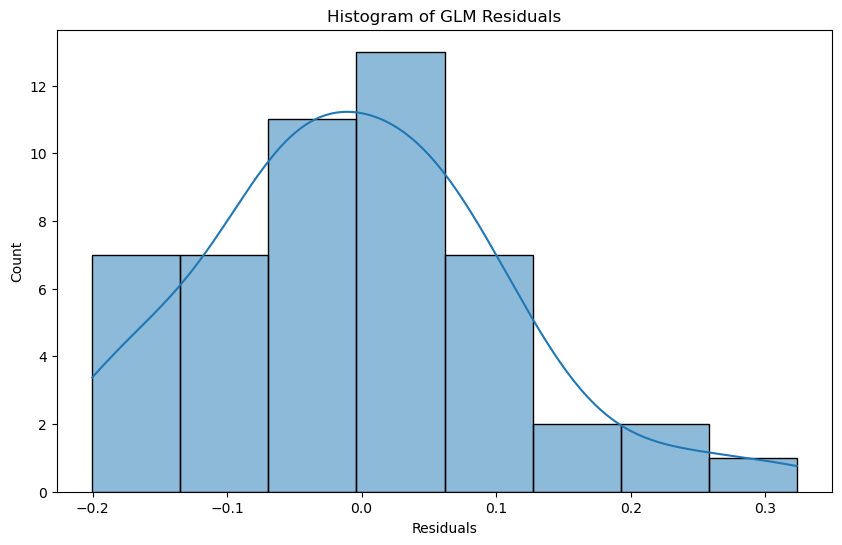

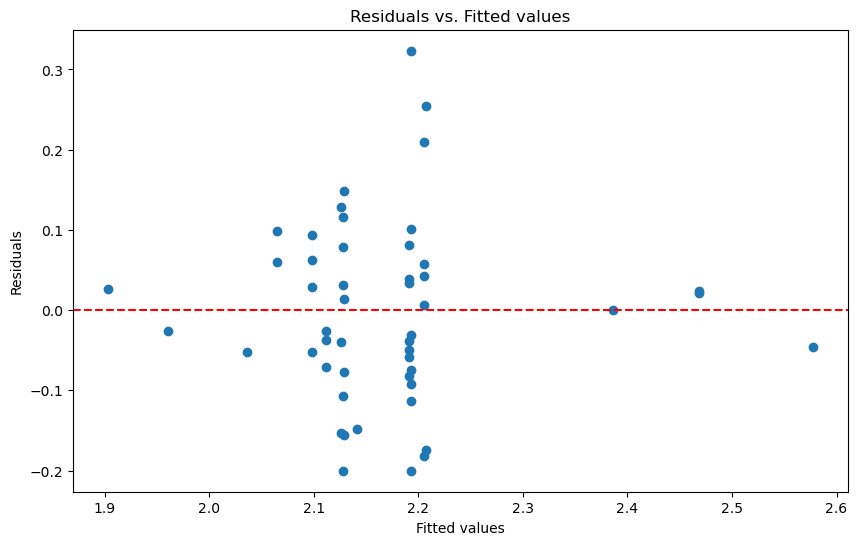

                               nod
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Incorrect   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.76
Date:                Fri, 14 Feb 2025   Deviance:                       131.70
Time:                        13:37:22   Pearson chi2:                     125.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4233
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

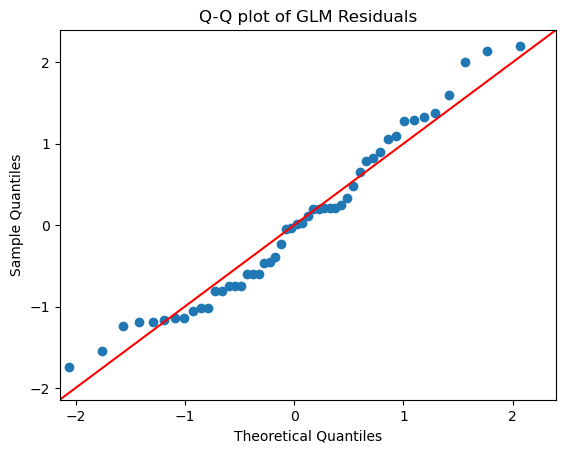

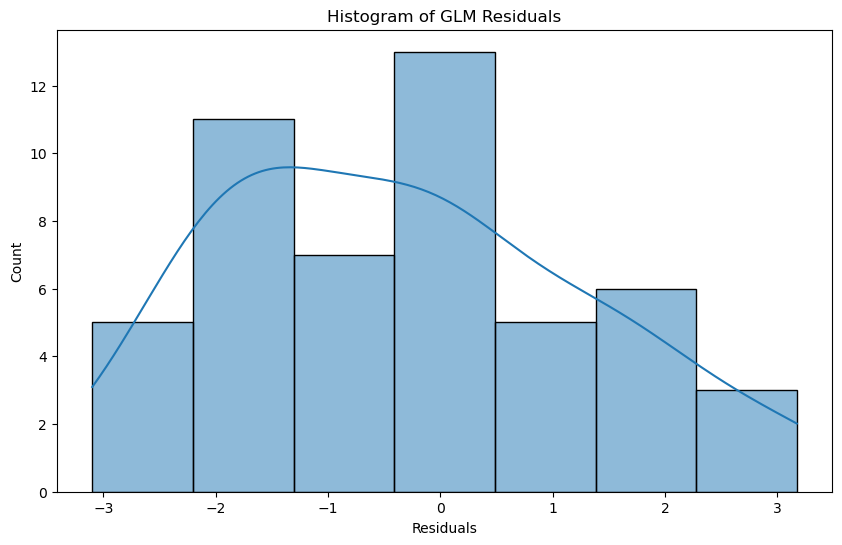

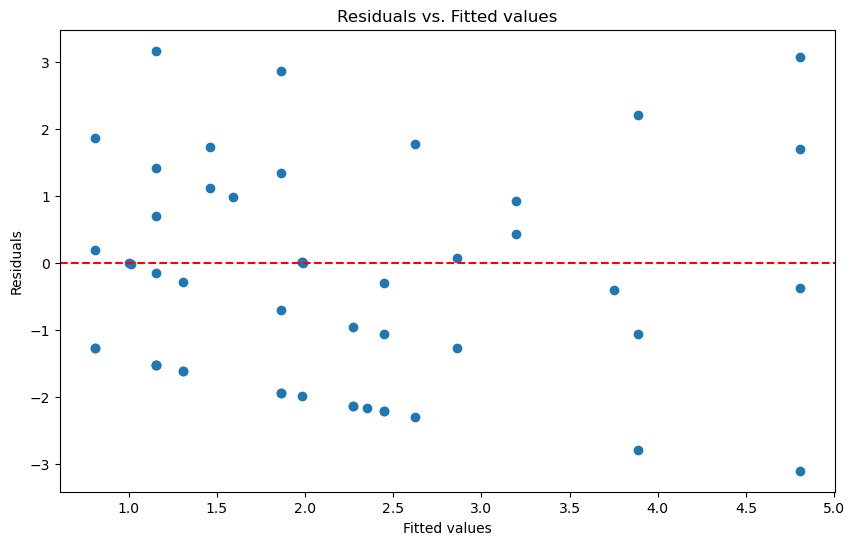

                               nod
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Points   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.015345
Method:                          IRLS   Log-Likelihood:                -216.51
Date:                Fri, 14 Feb 2025   Deviance:                      0.67204
Time:                        13:37:23   Pearson chi2:                    0.614
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1704
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

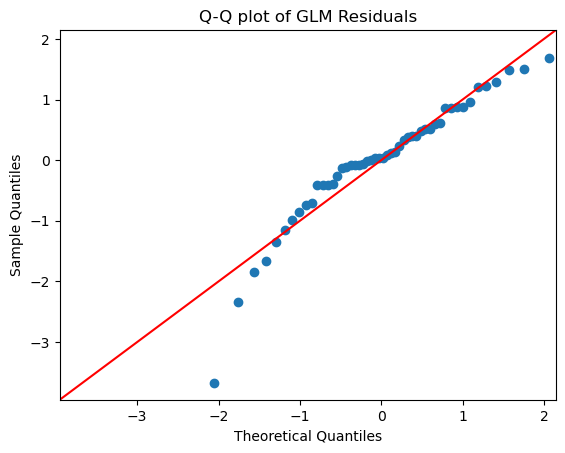

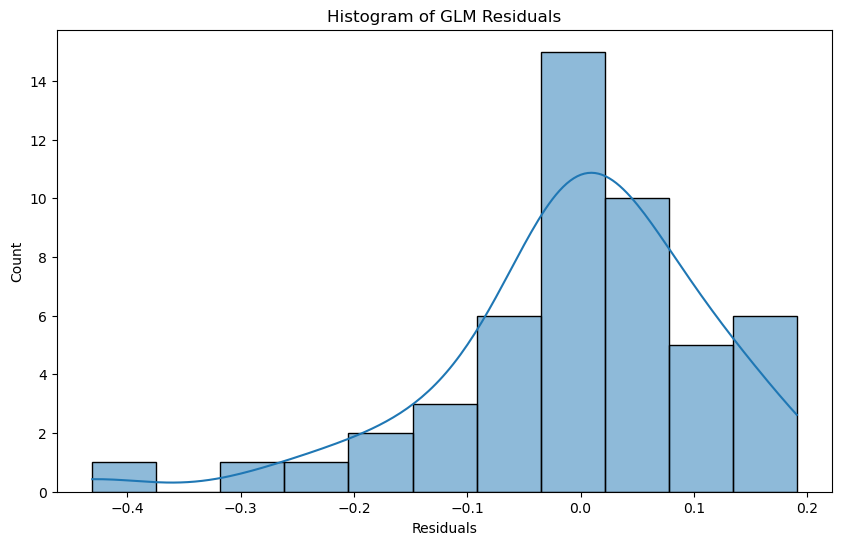

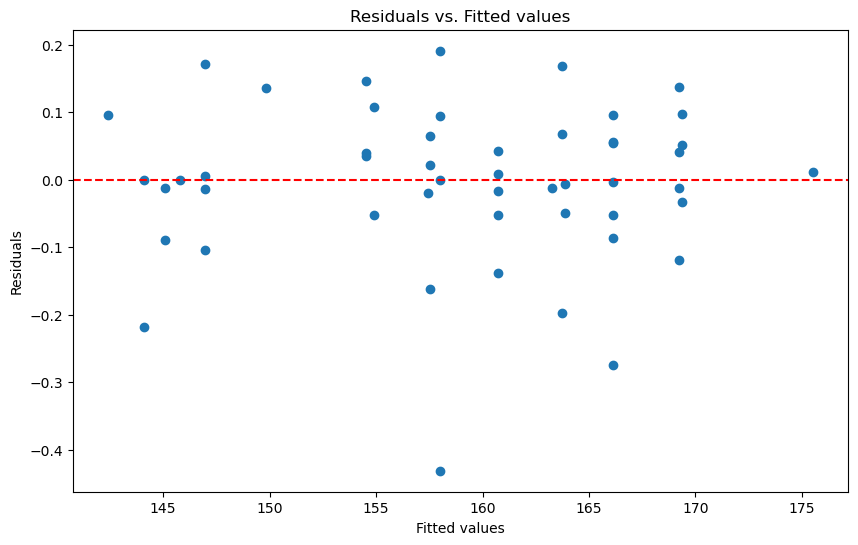

                               nod
                 Generalized Linear Model Regression Results                  
Dep. Variable:         MeanTimeOnTask   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.074564
Method:                          IRLS   Log-Likelihood:                -32.035
Date:                Fri, 14 Feb 2025   Deviance:                       2.1478
Time:                        13:37:23   Pearson chi2:                     2.98
No. Iterations:                    12   Pseudo R-squ. (CS):            0.09000
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

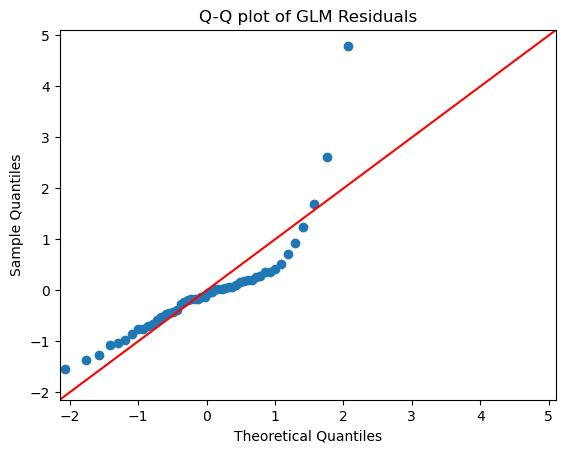

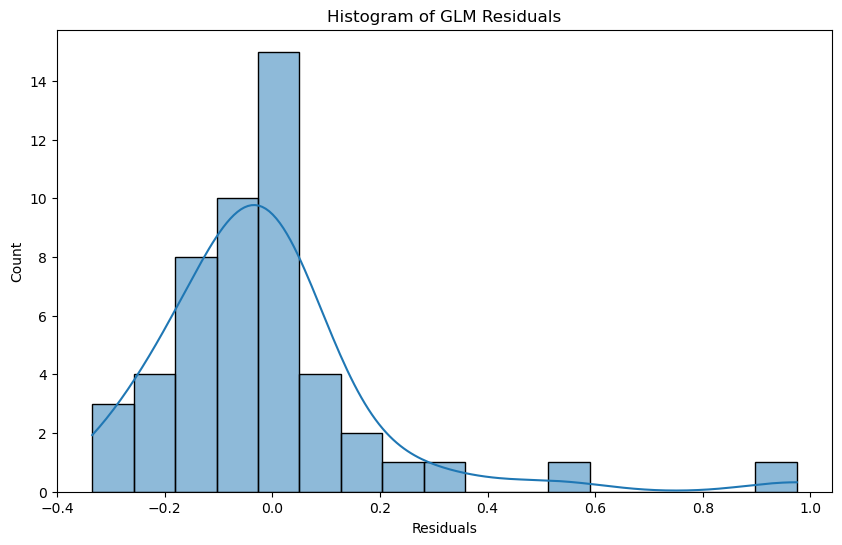

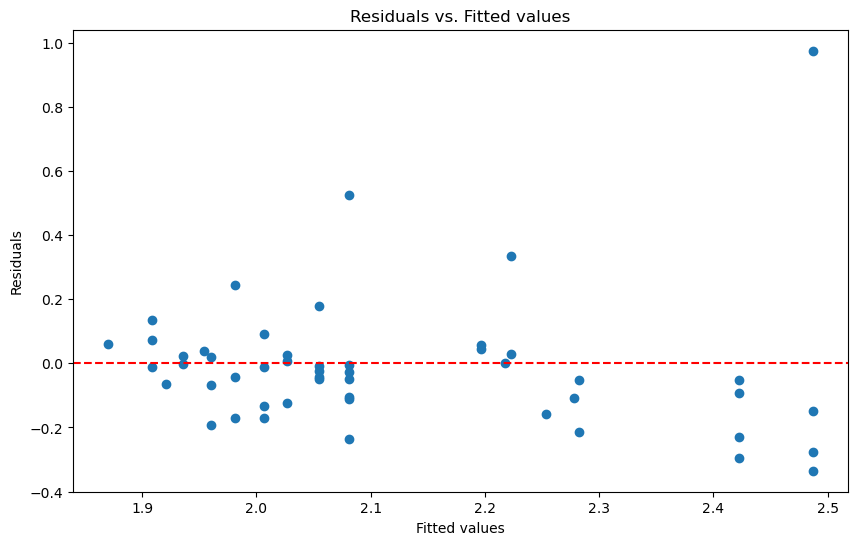

                               smoothPursuit
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Incorrect   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.670
Date:                Fri, 14 Feb 2025   Deviance:                       37.855
Time:                        13:37:24   Pearson chi2:                     48.6
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

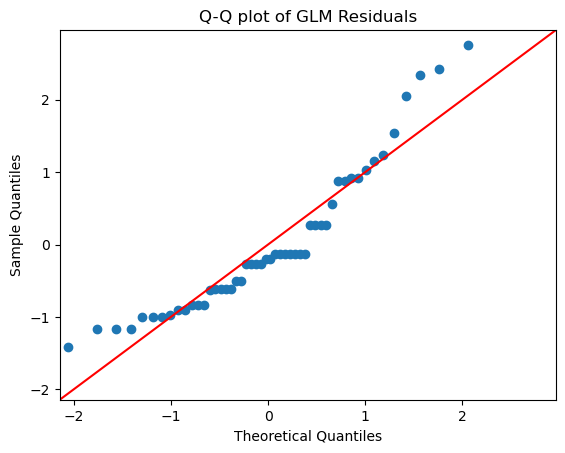

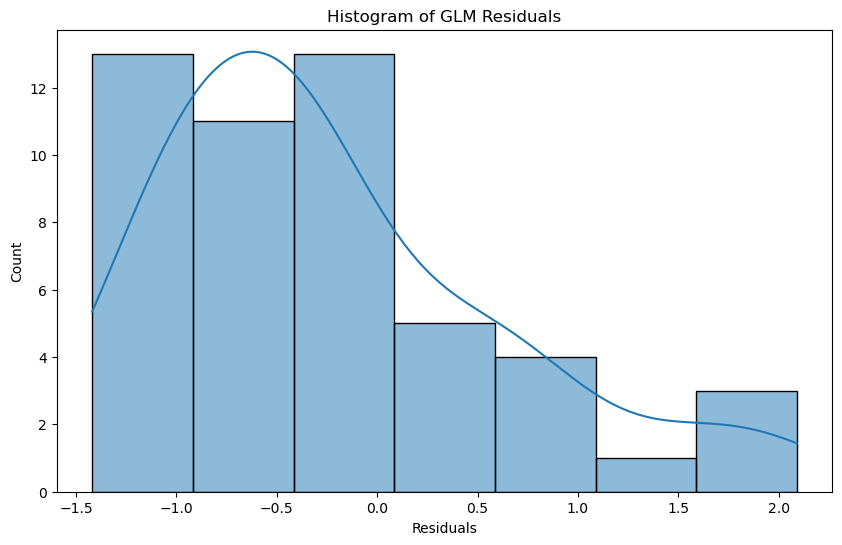

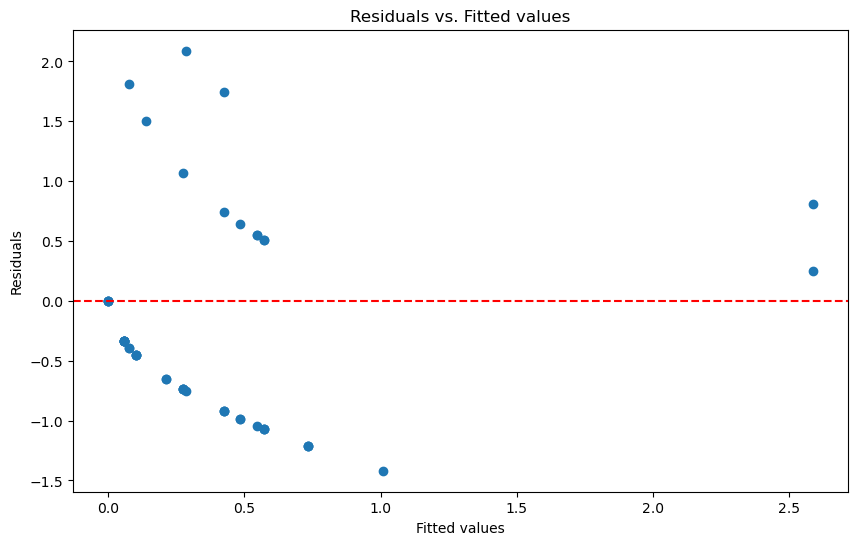

                               smoothPursuit
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Points   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.021105
Method:                          IRLS   Log-Likelihood:                -211.46
Date:                Fri, 14 Feb 2025   Deviance:                      0.92900
Time:                        13:37:25   Pearson chi2:                    0.844
No. Iterations:                     9   Pseudo R-squ. (CS):            0.05769
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

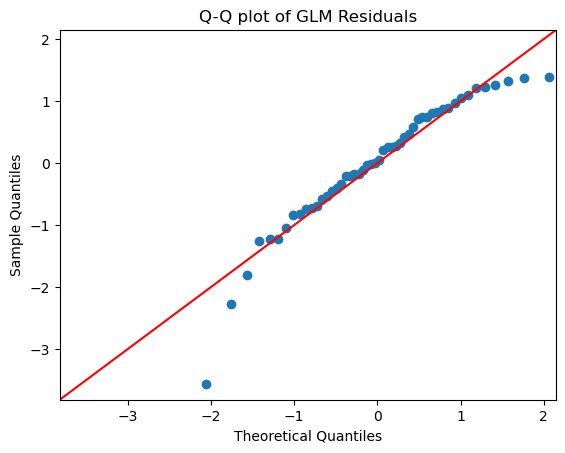

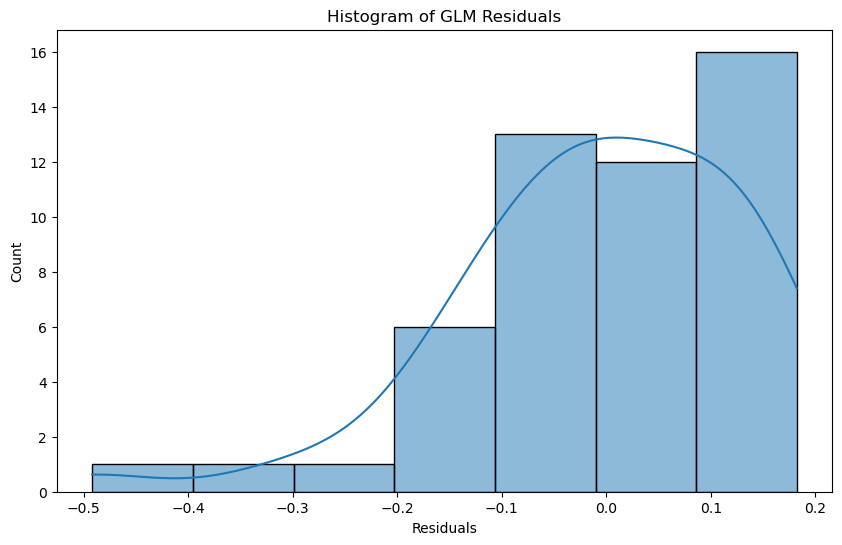

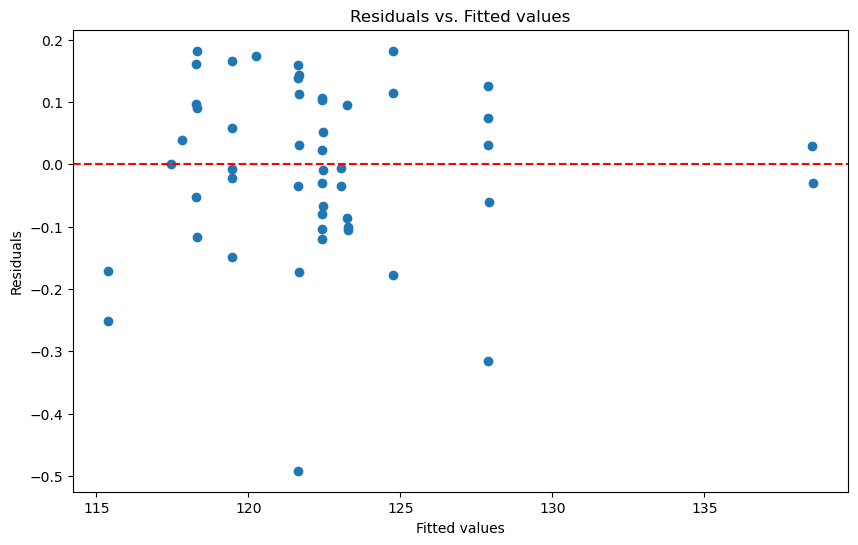

                               smoothPursuit
                 Generalized Linear Model Regression Results                  
Dep. Variable:         MeanTimeOnTask   No. Observations:                   50
Model:                            GLM   Df Residuals:                       40
Model Family:                   Gamma   Df Model:                            9
Link Function:                    log   Scale:                        0.022039
Method:                          IRLS   Log-Likelihood:                -19.192
Date:                Fri, 14 Feb 2025   Deviance:                      0.81530
Time:                        13:37:25   Pearson chi2:                    0.882
No. Iterations:                     9   Pseudo R-squ. (CS):            0.06460
Covariance Type:            nonrobust                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

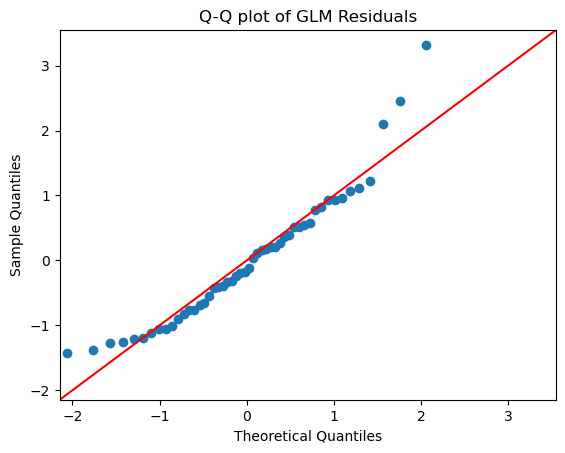

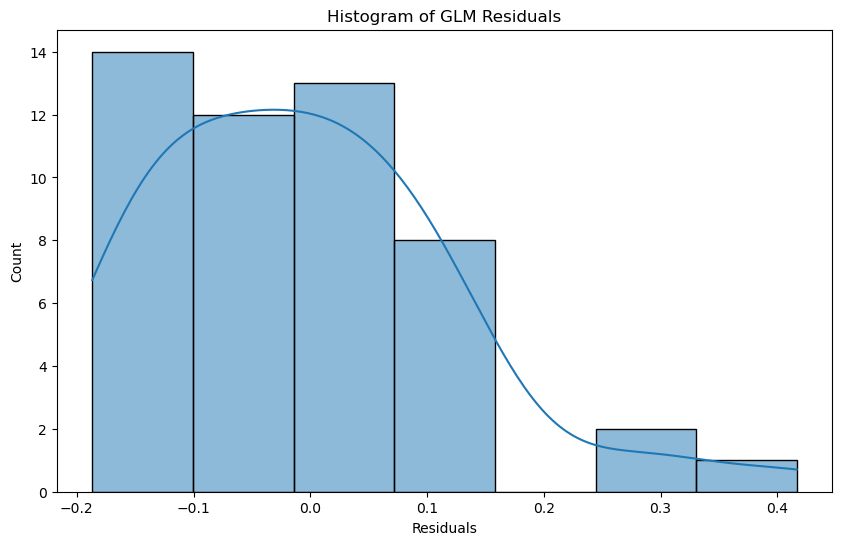

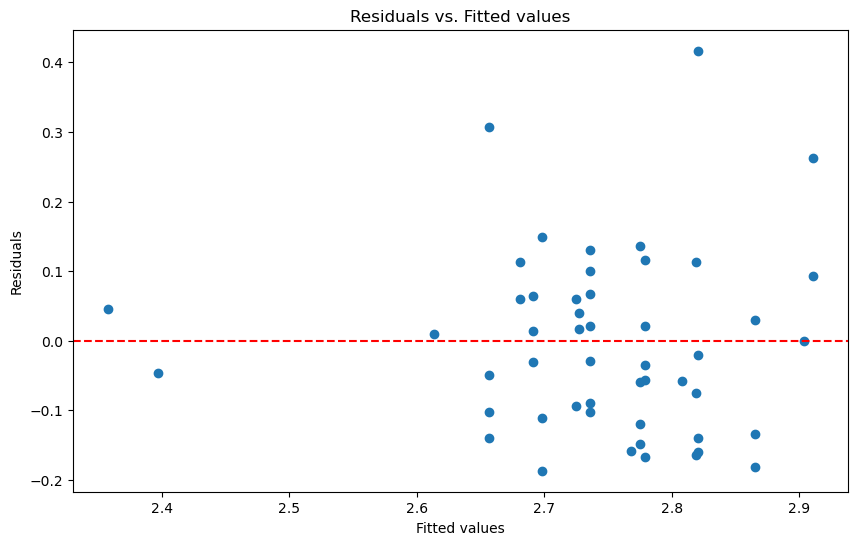

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import io
cond = "nod"
target = "Incorrect"
pdf_basepath = "Data/Regression_Report_"
for cond in Recording.conditions:
    pdf_path = pdf_basepath + cond + ".pdf"
    c = canvas.Canvas(pdf_path, pagesize=letter)
    for target in ["Incorrect", "Points", "MeanTimeOnTask"]:
    
        print("="*80)
        print(" "*30, cond)
        print("="*80)
        
        
        width, height = letter

        # add title
        c.setFont("Helvetica-Bold", 20)
        c.drawString(40, height-50, f"GLM Regression Analysis for {target} as target")

        c.setFont("Courier", 5)
        # create dataframe with features and target value
        summary = list()
        for k in round_results[cond]:
            values = list()
            if recs[k].gender not in ["Male", "Female"]:
                continue
            if target == "Incorrect":
                for r in round_results[cond][k]:
                    values.append(round_results[cond][k][r][target])
                target_value = np.sum(values)
            else: 
                for r in round_results[cond][k]:
                    values.append(round_results[cond][k][r][target])
                target_value = np.mean(values)
            summary.append({
                "Gender": recs[k].gender,
                "ET_Experience": recs[k].et_exp,
                "VR_Experience": recs[k].vr_exp,
                "Pref_Method": recs[k].pref_method,
                "Group": recs[k].group,
                target: target_value
            })
        summary_df = pd.DataFrame(summary)

        # create regression analysis of the features to the target value

        # formula = '%s ~ C(Gender) + C(ET_Experience) + C(VR_Experience) + C(Pref_Method) + C(Group)' % target
        formula = '%s ~ C(Gender) * C(ET_Experience) * C(VR_Experience) + C(Pref_Method)' % target
        if target == "Incorrect":
            model = smf.glm(formula, data=summary_df, family=sm.families.Poisson(link=sm.families.links.log())).fit()
        else: 
            model = smf.glm(formula, data=summary_df, family=sm.families.Gamma(link=sm.families.links.log())).fit()
        print(model.summary())
        
        c.drawString(40, height-80, "Formular: " + formula)

        # add model summary to pdf
        summary_text = model.summary().as_text()
        test_lines = summary_text.split("\n")
        y = height - 100
        for line in test_lines:
            c.drawString(40, y, line)
            y -= 10


        # Check the residuals
        # Q-Q plot
        sm.qqplot(model.resid_deviance, line='45', fit=True)
        plt.title('Q-Q plot of GLM Residuals')
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        c.drawImage(ImageReader(buf), 40, y-200, width=300, height=200)
        buf.close()
        plt.show()

        # Histogram of residuals
        plt.figure(figsize=(10, 6))
        sns.histplot(model.resid_deviance, kde=True)
        plt.xlabel('Residuals')
        plt.title('Histogram of GLM Residuals')
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        c.drawImage(ImageReader(buf), 40, y-400, width=300, height=200)
        plt.show()

        # Check for heteroscedasticity
        # Plot residuals vs. fitted values
        plt.figure(figsize=(10, 6))
        plt.scatter(model.fittedvalues, model.resid_deviance)
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs. Fitted values')
        plt.axhline(0, color='red', linestyle='--')
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        c.drawImage(ImageReader(buf), 315, y-200, width=300, height=200)
        buf.close()
        plt.show()
        
        c.showPage()
    c.save()

# Something that does not work... trying linear regresion paras -> incorrects

In [32]:

paras = recs.get_final_parameters("nod")
paras_vali = (np.array(paras["DegreeEnd"]) < np.array(paras["DegreeMove"])) & (np.array(paras["DegreeMove"]) > 8)
pats = recs[list(np.array(paras["Participant"])[paras_vali])]
incorrect = 0
for pat in pats:
    sum_rounds = pat.summarize_rounds("nod")
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
incorrect

12

In [33]:
from sklearn.linear_model import LinearRegression
condition = "nod"
paras = recs.get_final_parameters(condition)
fails = list()
for pat in paras["Participant"]:
    sum_rounds = recs[pat].summarize_rounds(condition)
    incorrect = 0
    for k in sum_rounds:
        incorrect += sum_rounds[k]["Incorrect"]
    fails.append(incorrect)
X = np.array([paras["DegreeMove"], paras["DegreeEnd"]]).transpose()
y = np.array(fails)
print(f"{X.shape=}")
print(f"{y.shape=}")
lm = LinearRegression()
lm.fit(X, y)
print("Intercept", lm.intercept_)
print("Coeffs", lm.coef_)
print("R-squere", lm.score(X, y))

X.shape=(52, 2)
y.shape=(52,)
Intercept 5.4536869531319
Coeffs [-0.7490909   0.58792375]
R-squere 0.18664196773046338


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     4.046
Date:                Fri, 14 Feb 2025   Prob (F-statistic):             0.0121
Time:                        13:37:27   Log-Likelihood:                -120.18
No. Observations:                  52   AIC:                             248.4
Df Residuals:                      48   BIC:                             256.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6140      3.293      0.794      0.4

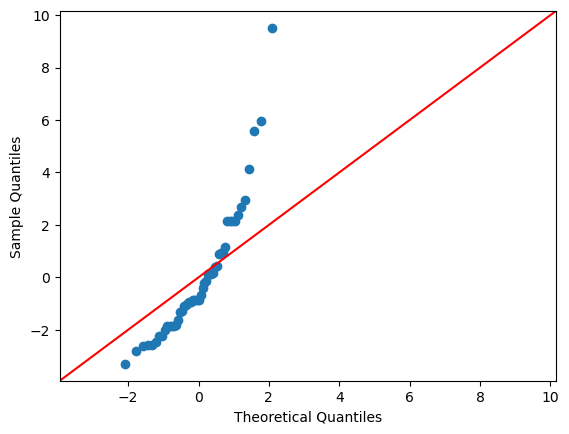

In [34]:
import statsmodels.api as sm
deg_end = np.array(paras["DegreeEnd"])
deg_move = np.array(paras["DegreeMove"])
X = np.array([ deg_end, deg_move, deg_end*deg_move]).transpose()
X_sm = sm.add_constant(X)
lm_sm = sm.OLS(y, X_sm).fit()
print(lm_sm.summary())
residuals = lm_sm.resid
fig, ax = plt.subplots()
sm.qqplot(residuals, ax=ax)
sm.qqline(ax=ax, line="45")

# Distribution of used parameters

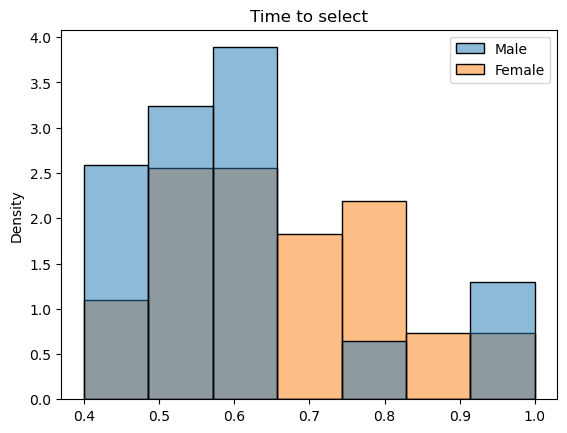

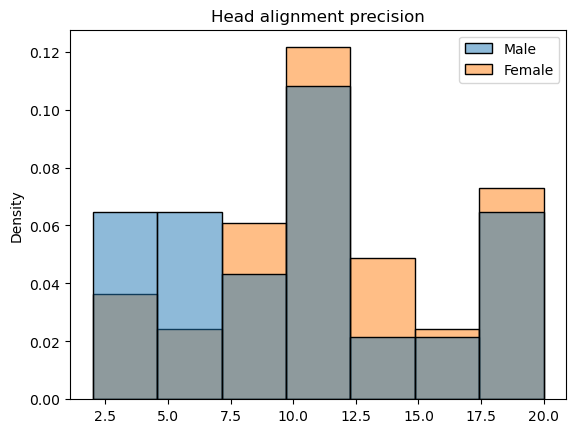

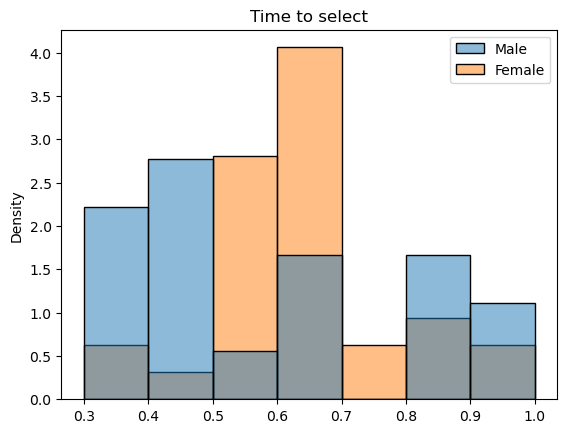

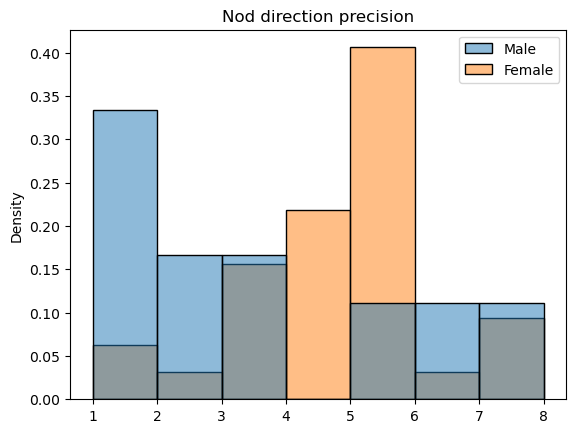

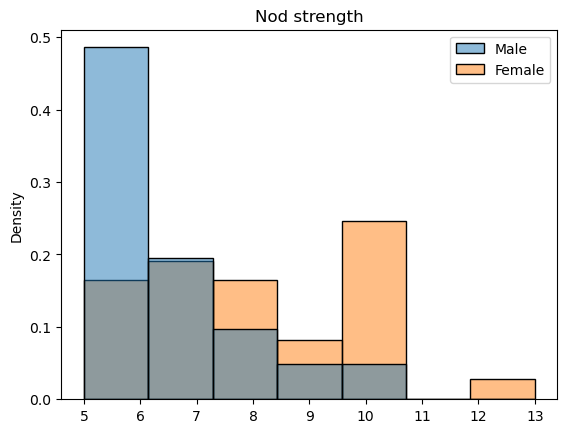

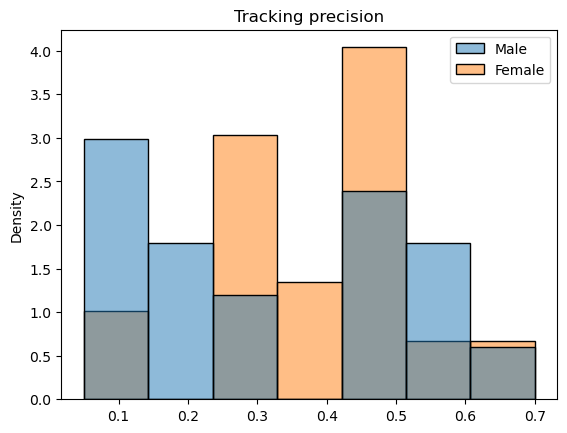

In [35]:
import matplotlib.pyplot as plt

rename_dict = {
    "DwellTime": "Time to select",
    "HeadGazeCorrection": "Head alignment precision",
    "DegreeEnd": "Nod direction precision",
    "DegreeMove": "Nod strength",
    "CorrelationTH": "Tracking precision",
    "Shape": "Movement pattern"
}

for cond in Recording.conditions: 
    df = pd.DataFrame(recs.get_final_parameters(cond))
    df["Gender"] = df.Participant.apply(lambda x: recs[x].gender)
    paras = Recording.parameter[cond]
    for para in paras:
        # plt.hist([df.loc[df.Gender=="Male", para].to_numpy(),
        #           df.loc[df.Gender=="Female", para].to_numpy()],
        #           label=["Male", "Female"], )
        # plt.legend()
        if para=="Shape":
            continue
        sns.histplot({"Male": df.loc[df.Gender=="Male", para].to_numpy(),
                     "Female": df.loc[df.Gender=="Female", para].to_numpy()},
                     fill=True, multiple="layer", common_norm=False,
                     stat="density")
        plt.title(rename_dict[para])
        plt.savefig(f"Pictures/ParaHistogram_{para}.png")
        plt.show()
        # df.loc[df.Gender!="Non-binary", [para, "Gender"]].hist(legend=True, by="Gender")

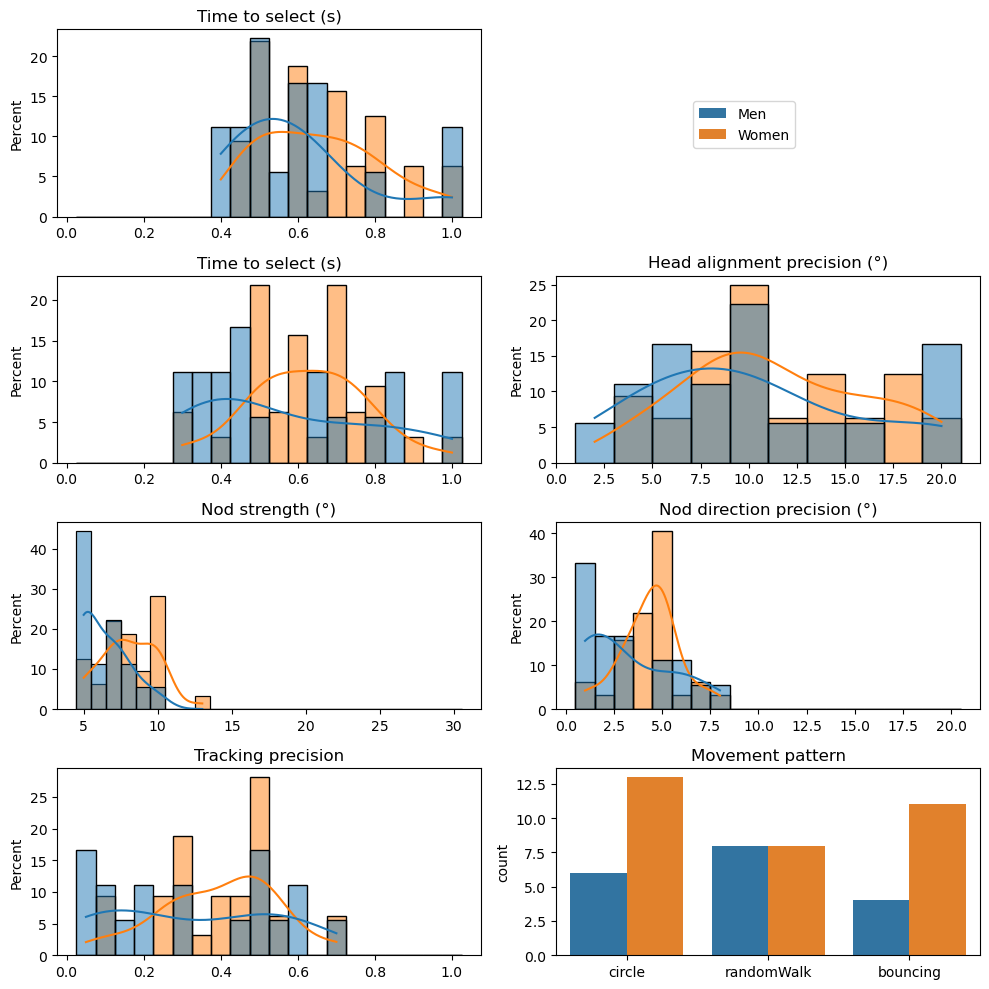

,Method,Parameter,Mannwhitney_value,Mannwithney_p,T_value,T_p,KS_value,KS_p
0,gaze,Time to select (s),214.0,0.133736,-1.216541,0.229727,0.302083,0.194061
1,headAndGaze,Head alignment precision (°),245.0,0.385284,-0.780973,0.438653,0.177083,0.793416
2,headAndGaze,Time to select (s),234.5,0.281465,-0.768739,0.445814,0.406250,0.031150
3,nod,Nod direction precision (°),191.5,0.047837,-2.100102,0.041000,0.416667,0.025464
4,nod,Nod strength (°),143.0,0.002916,-3.199564,0.002440,0.371528,0.061659
5,smoothPursuit,Tracking precision,238.5,0.317226,-1.328817,0.190191,0.350694,0.089336


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

rename_dict = {
    "DwellTime": "Time to select (s)",
    "HeadGazeCorrection": "Head alignment precision (°)",
    "DegreeEnd": "Nod direction precision (°)",
    "DegreeMove": "Nod strength (°)",
    "CorrelationTH": "Tracking precision",
    "Shape": "Movement pattern"
}
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
fig.delaxes(axs[0,1])
axs = {
    "gaze": {
        "DwellTime": axs[0, 0]
    },
    "headAndGaze": {
        "DwellTime": axs[1, 0],
        "HeadGazeCorrection": axs[1, 1]
    },
    "nod": {
        "DegreeMove": axs[2, 0],
        "DegreeEnd": axs[2, 1]
    },
    "smoothPursuit": {
        "CorrelationTH": axs[3, 0],
        "Shape": axs[3,1]
    }
}

dwelltime_values = np.linspace(0.05, 1, 20)
headGazeCorrecten_values = np.linspace(2, 20, 10)
nodStrength_values = np.linspace(5, 30, 26)
nodEnd_values = np.linspace(1, 20, 20)
smoothPursuitCorr_values = np.linspace(0.05, 1, 20)
binrange = {
    "gaze": {
        "DwellTime": (0.025, 1.025), # [[x-0.025, x+0.025] for x in dwelltime_values]
    },
    "headAndGaze": {
        "DwellTime": (0.025, 1.025), #[[x-0.025, x+0.025] for x in dwelltime_values],
        "HeadGazeCorrection": (1, 21), # [[x-1, x+1] for x in headGazeCorrecten_values]
    },
    "nod": {
        "DegreeMove": (4.5, 30.5), # [[x-0.5, x+0.5] for x in nodStrength_values],
        "DegreeEnd": (0.5, 20.5), # [[x-0.5, x+0.5] for x in nodEnd_values]
    },
    "smoothPursuit": {
        "CorrelationTH": (0.025, 1.025), # [[x-0.025, x+0.025] for x in smoothPursuitCorr_values],
        "Shape": np.nan
    }
}
bin_count= {
    "gaze": {
        "DwellTime": 20
    },
    "headAndGaze": {
        "DwellTime": 20,
        "HeadGazeCorrection": 10
    },
    "nod": {
        "DegreeMove": 26,
        "DegreeEnd": 20
    },
    "smoothPursuit": {
        "CorrelationTH": 20,
        "Shape": np.nan
    }
}
binwidth = {
    "gaze": {
        "DwellTime": 0.05
    },
    "headAndGaze": {
        "DwellTime": 0.05,
        "HeadGazeCorrection": 2
    },
    "nod": {
        "DegreeMove": 1,
        "DegreeEnd": 1
    },
    "smoothPursuit": {
        "CorrelationTH": 0.05,
        "Shape": np.nan
    }
}

rename_gender={
    "Male": "Men",
    "Female": "Women",
    "Non-binary": "Non-binary",
    "Prefer not to say": "Prefer not to say"
}
test_results = list()
for cond in Recording.conditions: 
    df = pd.DataFrame(recs.get_final_parameters(cond))
    df["Gender"] = df.Participant.apply(lambda x: rename_gender[recs[x].gender])
    df = df.loc[(df.Gender!="Non-binary") & (df.Gender!="Prefer not to say")]
    paras = Recording.parameter[cond]
    for para in paras:
        # plt.hist([df.loc[df.Gender=="Male", para].to_numpy(),
        #           df.loc[df.Gender=="Female", para].to_numpy()],
        #           label=["Male", "Female"], )
        # plt.legend()
        ax = axs[cond][para]
        if para=="Shape":
            # continue
            sns.countplot(x=para, hue="Gender", data=df.sort_values("Gender"), ax=ax)
            ax.set_xlabel("")
            ax.get_legend().remove()
        else:
            male_values = df.loc[df.Gender=="Men", para].to_numpy()
            female_values = df.loc[df.Gender=="Women", para].to_numpy()
            # sns.kdeplot({"Male": male_values,
            #             "Female": female_values},
            #             fill=True, multiple="layer", common_norm=False,
            #             ax=ax, legend=False, 
            #             color={"Male": "orange", "Female": "blue"})
            # ax.axvline(np.median(male_values), color="orange")
            # ax.axvline(np.median(female_values), color="blue")
            sns.histplot({"Men": male_values, "Women": female_values},
                         multiple="layer", common_norm=False, ax=ax, 
                         legend=False, stat="percent", kde=True, 
                         bins=bin_count[cond][para], binrange=binrange[cond][para]) #binwidth=binwidth[cond][para])
            mannwhitney_test = stats.mannwhitneyu(male_values, female_values)
            t_test = stats.ttest_ind(male_values, female_values)
            ks_test = stats.ks_2samp(male_values, female_values)
            test_results.append({
                "Method": cond,
                "Parameter": rename_dict[para],
                "Mannwhitney_value": mannwhitney_test.statistic,
                "Mannwithney_p": mannwhitney_test.pvalue,
                "T_value": t_test.statistic,
                "T_p": t_test.pvalue,
                "KS_value": ks_test.statistic,
                "KS_p": ks_test.pvalue
            })
        # plt.title(rename_dict[para])
        # plt.savefig(f"Pictures/ParaKde_{para}.png")
        # plt.show()
        ax.set_title(f"{rename_dict[para]}")
fig.legend(loc=(0.7, 0.85), ncol=1)
fig.tight_layout()
plt.savefig("Pictures/parameter.png", dpi=500)
plt.show()
display(pd.DataFrame(test_results))

In [37]:
df.sort_values("Gender")

,CorrelationTH,Shape,Participant,Gender
24,0.30,circle,Pat025,Men
25,0.20,circle,Pat026,Men
23,0.60,randomWalk,Pat024,Men
33,0.05,circle,Pat034,Men
34,0.50,randomWalk,Pat035,Men
36,0.30,circle,Pat037,Men
40,0.60,randomWalk,Pat041,Men
28,0.55,bouncing,Pat029,Men
45,0.10,randomWalk,Pat046,Men
14,0.05,randomWalk,Pat015,Men


In [38]:
# Test differences between time on select in headAndGaze and only gaze based on gender
from scipy import stats

df_gaze = pd.DataFrame(recs.get_final_parameters("gaze"))
df_gaze["Gender"] = df_gaze.Participant.apply(lambda x: recs[x].gender)
df_headGaze = pd.DataFrame(recs.get_final_parameters("headAndGaze"))
df_headGaze["Gender"] = df_headGaze.Participant.apply(lambda x: recs[x].gender)

for g in ["Male", "Female"]:
    values_gaze = df_gaze.loc[df_gaze.Gender==g, "DwellTime"].to_numpy()
    values_headGaze = df_headGaze.loc[df_headGaze.Gender==g, "DwellTime"].to_numpy()
    ttest = stats.ttest_ind(values_gaze, values_headGaze)
    mannwhitneytest = stats.mannwhitneyu(values_gaze, values_headGaze)
    kstest = stats.ks_2samp(values_gaze, values_headGaze)
    print(g)
    print(f"t test: {ttest.statistic=:.3f}, {ttest.pvalue=:.5f}")
    print(f"Mann Whitney U test: {mannwhitneytest.statistic=:.3f}, {mannwhitneytest.pvalue=:.5f}")
    print(f"Kolmogorow-Smirnow-Test: {kstest.statistic=:.3f}, {kstest.pvalue=:.5f}")


Male
t test: ttest.statistic=0.279, ttest.pvalue=0.78225
Mann Whitney U test: mannwhitneytest.statistic=182.500, mannwhitneytest.pvalue=0.52479
Kolmogorow-Smirnow-Test: kstest.statistic=0.278, kstest.pvalue=0.50259
Female
t test: ttest.statistic=0.910, ttest.pvalue=0.36634
Mann Whitney U test: mannwhitneytest.statistic=559.000, mannwhitneytest.pvalue=0.52769
Kolmogorow-Smirnow-Test: kstest.statistic=0.094, kstest.pvalue=0.99933


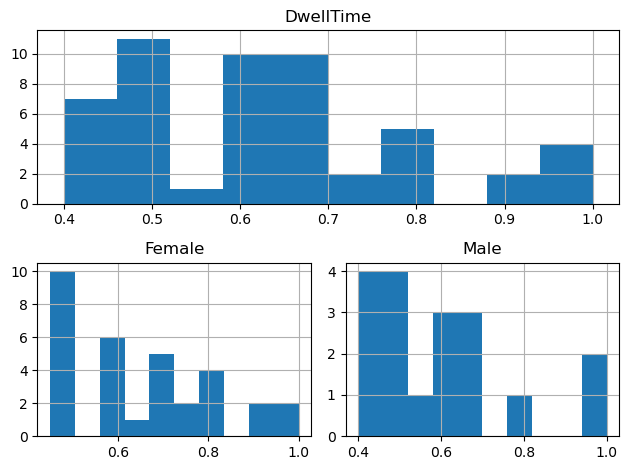

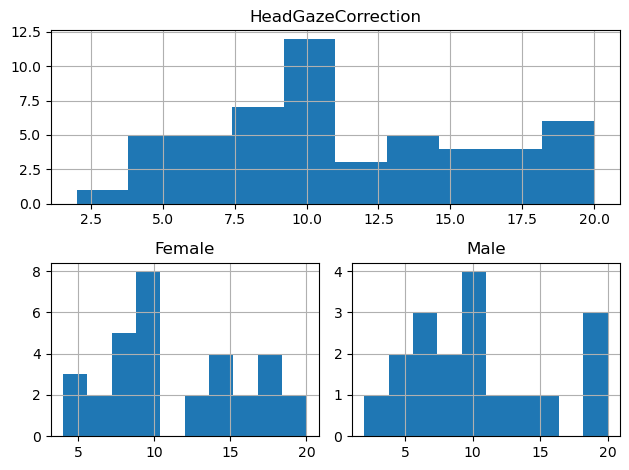

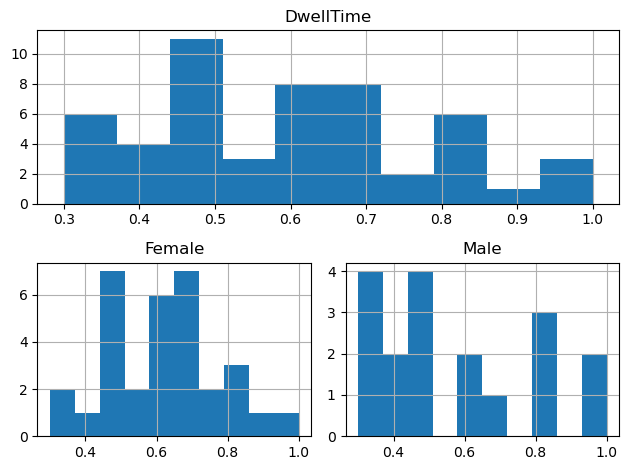

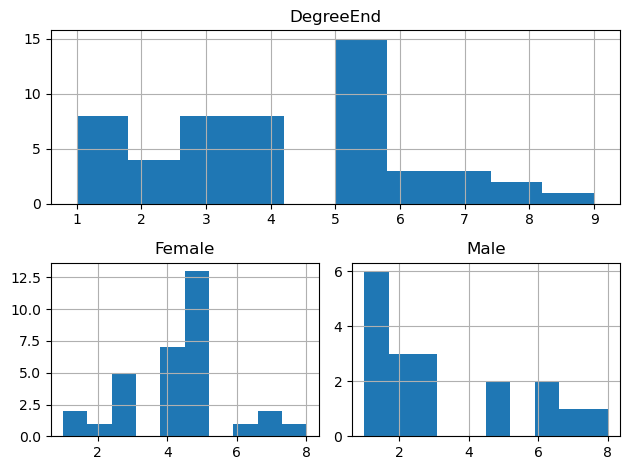

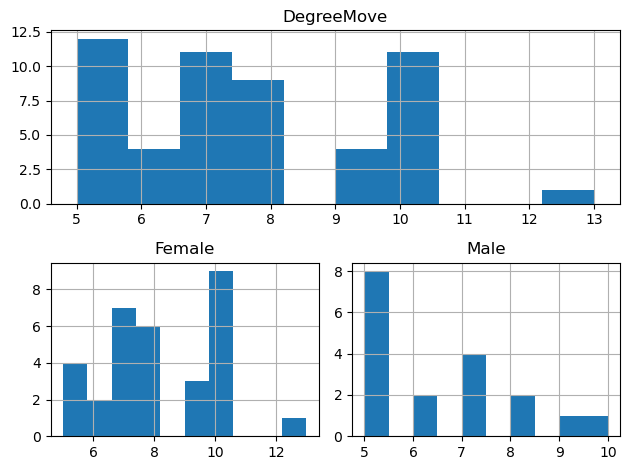

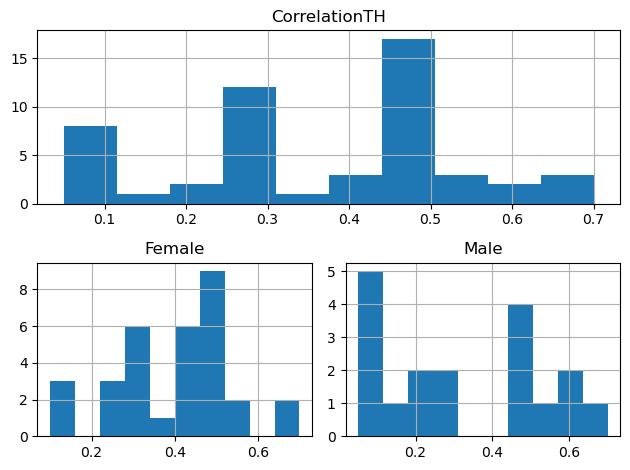

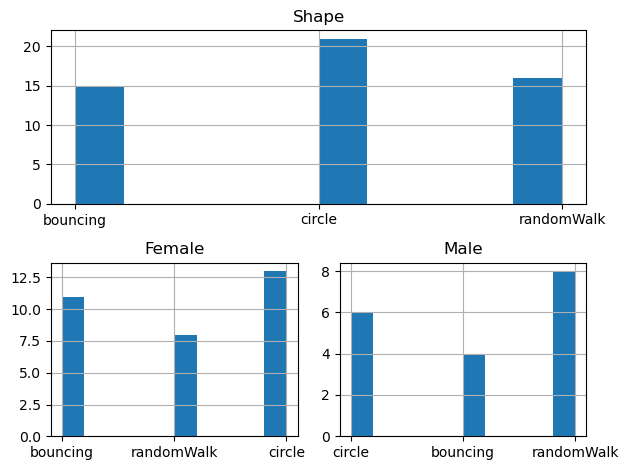

In [39]:
for cond in Recording.conditions: 
    df = pd.DataFrame(recs.get_final_parameters(cond))
    df["Gender"] = df.Participant.apply(lambda x: recs[x].gender)
    paras = Recording.parameter[cond]
    for para in paras:
        plt.subplot(2, 1, 1)
        df[para].hist()
        plt.title(para)
        plt.subplot(2, 2, 3)
        df.loc[df.Gender=="Female", para].hist()
        plt.title("Female")
        plt.subplot(2, 2, 4)
        df.loc[df.Gender=="Male", para].hist()
        plt.title("Male")
        plt.tight_layout()
        plt.show()


In [40]:
rec.summarize_rounds("nod")

{1: {'Correct': 10,
  'Incorrect': 1,
  'Points': 151,
  'DegreeEnd': 4,
  'DegreeMove': 8,
  'MeanTimeOnTask': 1.9771999999999934,
  'StdTimeOnTask': 1.2125242925401807,
  'TimeOnTask': [5.427000000000135,
   2.3869999999997162,
   1.3320000000003347,
   1.9769999999998618,
   1.2649999999998727,
   1.288000000000011,
   1.499000000000251,
   1.88799999999992,
   1.0209999999997308,
   1.6880000000001019],
  'FixationCount': 166,
  'MeanFixationDuration': 97.18072289156626},
 2: {'Correct': 10,
  'Incorrect': 0,
  'Points': 175,
  'DegreeEnd': 4,
  'DegreeMove': 8,
  'MeanTimeOnTask': 1.8983999999999923,
  'StdTimeOnTask': 0.5082387627878198,
  'TimeOnTask': [2.0949999999998,
   1.7649999999998727,
   2.8100000000004,
   1.731999999999971,
   1.77599999999984,
   1.043999999999869,
   1.4320000000002437,
   1.5989999999997053,
   2.6649999999999636,
   2.0660000000002583],
  'FixationCount': 149,
  'MeanFixationDuration': 99.94630872483222},
 3: {'Correct': 10,
  'Incorrect': 1,
  'Po

In [41]:
rec.pref_method

'Head and gaze'

In [42]:
# pref method vs not pref
import pandas as pd
import numpy as np
from scipy import stats

features = ["Points", "Time", "Incorrects"]

results = {x: {"Preferred": {x: list() for x in features}, 
               "Not preferred": {x: list() for x in features}} 
               for x in Recording.conditions}

rename_dict = {
    'gaze': 'Gaze',
    'headAndGaze': 'Head and gaze',
    'nod': 'Nod',
    'smoothPursuit': 'Smooth pursuit'
}

for rec in recs:
    for cond in Recording.conditions:
        final_rounds = rec.get_final_rounds(cond)
        summary_rounds = rec.summarize_rounds(cond)
        pref = "Preferred" if rename_dict[cond] == rec.pref_method else "Not preferred"
        results[cond][pref]["Points"] += final_rounds["Points"].to_list()
        results[cond][pref]["Incorrects"] += final_rounds["IncorrectDestroyed"].to_list()
        timeOnTask = list()
        for k in summary_rounds:
            timeOnTask += summary_rounds[k]["TimeOnTask"]
        results[cond][pref]["Time"] += timeOnTask

summary = [{
    "Method": rename_methods[x],
    "Preferred mean points": np.mean(results[x]["Preferred"]["Points"]),
    "Not preferred mean points": np.mean(results[x]["Not preferred"]["Points"]),
    "p value mean points": stats.mannwhitneyu(results[x]["Preferred"]["Points"], results[x]["Not preferred"]["Points"]),
    "Preferred mean time": np.mean(results[x]["Preferred"]["Time"]),
    "Not preferred mean time": np.mean(results[x]["Not preferred"]["Time"]),
    "p value mean time": stats.mannwhitneyu(results[x]["Preferred"]["Time"], results[x]["Not preferred"]["Time"]),
    "Preferred Incorrects": np.sum(results[x]["Preferred"]["Incorrects"]),
    "Not preferred Incorrects": np.sum(results[x]["Not preferred"]["Incorrects"]),
    "p value incorrects": stats.mannwhitneyu(results[x]["Preferred"]["Incorrects"], results[x]["Not preferred"]["Incorrects"])
} for x in Recording.conditions]
summary_df = pd.DataFrame(summary).set_index("Method")
summary_df


,Preferred mean points,Not preferred mean points,p value mean points,Preferred mean time,Not preferred mean time,p value mean time,Preferred Incorrects,Not preferred Incorrects,p value incorrects
Method,,,,,,,,,
Gaze,144.297710,144.735369,"(25412.0, 0.8263251720400848)",2.049744,2.051940,"(2218485.5, 0.7839389137908344)",35,136,"(25235.0, 0.6473343876081021)"
Head and Gaze,151.503145,146.269608,"(35791.5, 0.055257128489714126)",2.062962,2.166406,"(2479624.0, 9.601154018921606e-06)",31,42,"(34841.0, 0.0095352856981425)"
Nod,165.353488,155.733746,"(43766.0, 2.965387632194835e-07)",1.943348,2.038686,"(2809481.0, 2.0658678851343454e-10)",31,83,"(32304.5, 0.033958781053003706)"
Smooth Pursuit,121.233333,122.901354,"(7196.5, 0.5067442267635309)",2.726027,2.668643,"(465433.5, 0.2158613184537317)",0,21,"(7485.0, 0.30005607978920323)"


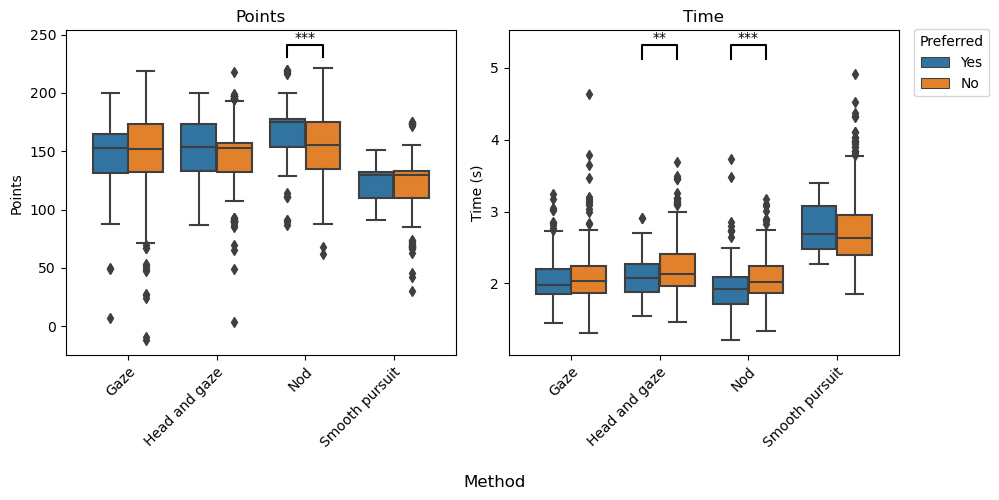

,Method,Feature,Test value,p value
0,gaze,Points,25412.0,8.263252e-01
1,headAndGaze,Points,35791.5,5.525713e-02
2,nod,Points,43554.0,1.819644e-08
3,smoothPursuit,Points,7136.5,4.825168e-01
4,gaze,Time,24836.5,5.467208e-01
5,headAndGaze,Time,26778.5,1.245271e-03
6,nod,Time,24843.0,2.293330e-07
7,smoothPursuit,Time,8653.0,2.686284e-01


In [58]:
# pref method vs not pref
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

features = ["Points", "Time", "Incorrects"]

# results = {x: {"Preferred": {x: list() for x in features}, 
#                "Not preferred": {x: list() for x in features}} 
#                for x in Recording.conditions}

rename_dict = {
    'gaze': 'Gaze',
    'headAndGaze': 'Head and gaze',
    'nod': 'Nod',
    'smoothPursuit': 'Smooth pursuit'
}

results = list()

for rec in recs:
    for cond in Recording.conditions:
        final_rounds = rec.get_final_rounds(cond)
        summary_rounds = rec.summarize_rounds(cond)
        # pref = "Preferred" if rename_dict[cond] == rec.pref_method else "Not preferred"
        # results[cond][pref]["Points"] += final_rounds["Points"].to_list()
        # results[cond][pref]["Incorrects"] += final_rounds["IncorrectDestroyed"].to_list()
        # timeOnTask = list()
        # for k in summary_rounds:
        #     timeOnTask += summary_rounds[k]["TimeOnTask"]
        # results[cond][pref]["Time"] += timeOnTask
        for _, row in final_rounds.iterrows():
            round = row["Round"]
            mean_time = summary_rounds[round]["MeanTimeOnTask"]
            if mean_time > 5:
                continue
            results.append({
                "Preferred method": "Yes" if rec.pref_method == rename_dict[cond] else "No",
                "Method": rename_dict[cond],
                "Points": row["Points"],
                "Time": mean_time,
                "Incorrects": row["IncorrectDestroyed"]
            })

res = pd.DataFrame(results)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
h = {
    "Points": 10,
    "Time": 0.2,
    "Incorrects": 0.4
}
x_value = {"gaze": 0, "headAndGaze": 1, "nod": 2, "smoothPursuit": 3}
test_results = list()
for i, f in enumerate(["Points", "Time"]):
    max_value = res[f].max()
    sns.boxplot(x="Method", y=f, hue="Preferred method", data=res, ax=axs[i])
    # handles, labels = axs[i].get_legend_handles_labels()
    if f == "Time": 
        axs[i].legend(loc='right', bbox_to_anchor=(1.25, 0.9), title="Preferred")
        axs[i].set_ylabel("Time (s)")
    else:
        axs[i].get_legend().remove()
    axs[i].set_title(f)
    # axs[i].tick_params(axis='x', labelrotation=45, horizontalalignment="right")
    plt.setp(axs[i].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    axs[i].set_xlabel("")
    for m in Recording.conditions:
        values_pref = res.loc[(res["Preferred method"]=="Yes") & (res["Method"]==rename_dict[m]), f].to_numpy()
        values_noPref = res.loc[(res["Preferred method"]=="No") & (res["Method"]==rename_dict[m]), f].to_numpy()
        test_stat, p = stats.mannwhitneyu(values_pref, values_noPref)
        test_results.append({
            "Method": m,
            "Feature": f,
            "Test value": test_stat,
            "p value": p
        })
        text = "NS"
        if p < 0.001: text='***'
        elif p < 0.01: text = '**'
        elif p < 0.05: text = '*'
        else: continue
        x = x_value[m]
        x1 = x - 0.2
        x2 = x + 0.2
        y1 = max_value + h[f]
        y2 = max_value + 2*h[f]
        axs[i].plot([x1, x1, x2, x2], [y1, y2, y2, y1], lw=1.5, c='k')
        axs[i].text((x1 + x2) * 0.5, y2, text, ha='center', va='bottom', color='k')
# fig.legend(handles, labels, title="Preferred method", loc=(0.94, 0.82))
fig.supxlabel("Method")
fig.tight_layout()
plt.savefig("Pictures/PreferredYesVSNo.png", dpi=500)
plt.show()

display(pd.DataFrame(test_results))


In [44]:
final_rounds

,Round,TimeToSelect,CorrelationTH,Velocity,Shape,StartDeviceTime,EndDeviceTime,Points,CorrectDestroyed,IncorrectDestroyed,EarlyStop
8,9,0.5,0.25,30,circle,1729771495227,1729771525243,133,8,0,False
9,10,0.5,0.25,30,circle,1729771561938,1729771591947,128,8,0,False
10,11,0.5,0.25,30,circle,1729771594246,1729771624254,130,8,0,False
11,12,0.5,0.25,30,circle,1729771626765,1729771656774,151,9,0,False
12,13,0.5,0.25,30,circle,1729771659483,1729771689493,112,7,0,False
13,14,0.5,0.25,30,circle,1729771692825,1729771722833,129,8,0,False
14,15,0.5,0.25,30,circle,1729771724466,1729771754474,109,7,0,False
15,16,0.5,0.25,30,circle,1729771757140,1729771787149,130,8,0,False
16,17,0.5,0.25,30,circle,1729771791025,1729771821034,115,7,0,False
17,18,0.5,0.25,30,circle,1729771824354,1729771854364,131,8,0,False


In [45]:
gender_rename = {'Female': 'Woman',
                 'Male': 'Man',
                 'Non-binary': 'Non-binary',
                 'Prefer not to say': 'Prefer not to say'}
cond_rename = {
    'gaze': 'Gaze',
    'headAndGaze': 'Head and gaze',
    'nod': 'Nod',
    'smoothPursuit': 'Smooth pursuit'
}

summary = list()

cond = "nod"
rec = recs[0]

for cond in Recording.conditions:
    for rec in recs:
        gender = gender_rename[rec.gender]
        if gender in ["Non-binary", "Prefer not to say"]:
            continue
        final_rounds_sum = rec.get_final_rounds(cond).sum()

        summary.append({
            "Gender": gender,
            "Method": cond_rename[cond],
            "Correct": int(final_rounds_sum["CorrectDestroyed"]),
            "Incorrect": int(final_rounds_sum["IncorrectDestroyed"])
        })

summary_df = pd.DataFrame(summary)

# group by Gender and Method sum Correct and Incorrect and count the entries
summary_grouped = summary_df.groupby(["Gender", "Method"]).agg({"Correct": "sum", "Incorrect": "sum"}).reset_index()
summary_grouped.pivot(index="Gender", columns="Method", values=["Correct", "Incorrect"])

Correct                                    Incorrect                    \
Method    Gaze Head and gaze   Nod Smooth pursuit      Gaze Head and gaze Nod   
Gender                                                                          
Man       1693          1700  1751           1385        56            29  56   
Woman     2994          3226  3142           2622       113            43  54   

                       
Method Smooth pursuit  
Gender                 
Man                14  
Woman               6

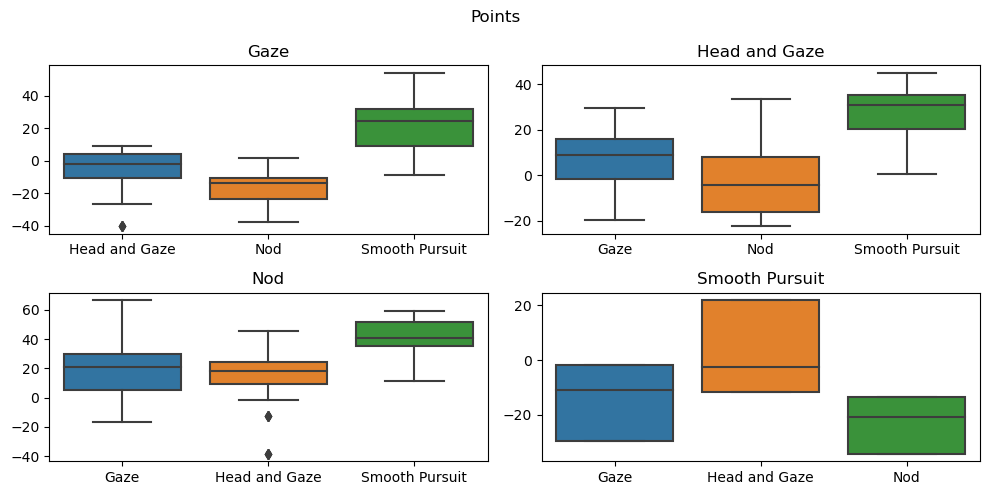

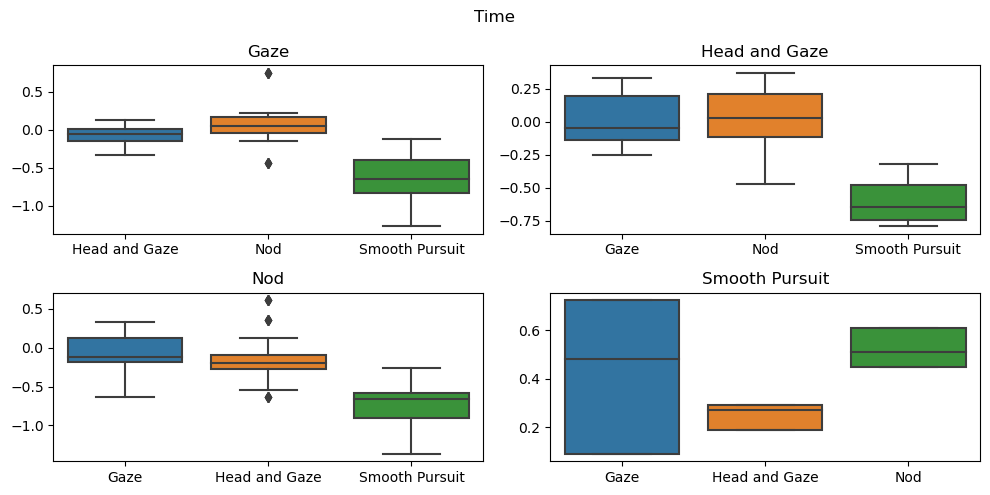

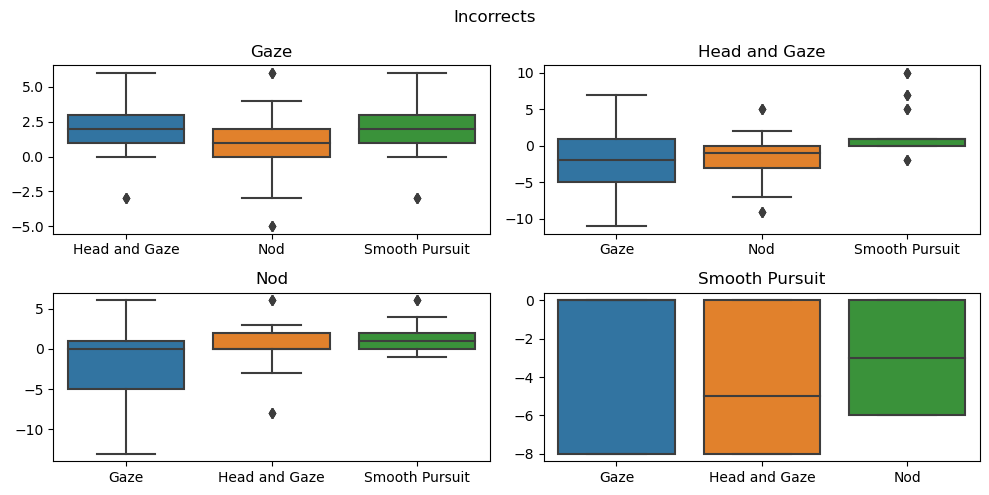

In [46]:
# pref method vs not pref
import pandas as pd
import numpy as np
from scipy import stats


features = ["Points", "Time", "Incorrects"]

# results = {x: {"Preferred": {x: list() for x in features}, 
#                "Not preferred": {x: list() for x in features}} 
#                for x in Recording.conditions}

results = {x : {y: {z: list() for z in features}
                for y in Recording.conditions if y != x}
           for x in Recording.conditions}

rename_dict = {
    'gaze': 'Gaze',
    'headAndGaze': 'Head and gaze',
    'nod': 'Nod',
    'smoothPursuit': 'Smooth pursuit'
}

rename_dict_rev = {
    "Gaze": "gaze",
    "Head and gaze": "headAndGaze",
    "Nod": "nod",
    "Smooth pursuit": "smoothPursuit"
}

def get_features(rec, method):
    final_rounds = rec.get_final_rounds(method)
    summary_rounds = rec.summarize_rounds(method)
    mean_points = final_rounds["Points"].mean()
    count_incorrects = final_rounds["IncorrectDestroyed"].sum()
    timeOnTask = list()
    for k in summary_rounds:
        timeOnTask += summary_rounds[k]["TimeOnTask"]
    mean_timeOnTask = np.mean(timeOnTask)
    return mean_points, count_incorrects, mean_timeOnTask

for cond_pref in Recording.conditions:
    for rec in recs:
        mean_points_pref, count_incorrects_pref, mean_timeOnTask_pref = get_features(rec, rename_dict_rev[rec.pref_method])
        for cond in Recording.conditions:
            if rename_dict[cond] == rec.pref_method:
                continue
            mean_points_notPref, count_incorrects_notPref, mean_timeOnTask_notPref = get_features(rec, cond)
            results[rename_dict_rev[rec.pref_method]][cond]["Points"].append(mean_points_pref - mean_points_notPref)
            results[rename_dict_rev[rec.pref_method]][cond]["Time"].append(mean_timeOnTask_pref - mean_timeOnTask_notPref)
            results[rename_dict_rev[rec.pref_method]][cond]["Incorrects"].append(count_incorrects_pref - count_incorrects_notPref)

for f in features:
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    axs = {'gaze': axs[0, 0], 'headAndGaze': axs[0, 1], 'nod': axs[1, 0], 'smoothPursuit': axs[1, 1]}
    for cond in results:
        sns.boxplot([results[cond][x][f] for x in results[cond]], ax=axs[cond])
        axs[cond].set_xticks([0, 1, 2], [rename_methods[x] for x in results[cond]])
        axs[cond].set_title(rename_methods[cond])
    fig.suptitle(f)
    fig.tight_layout()
    plt.show()

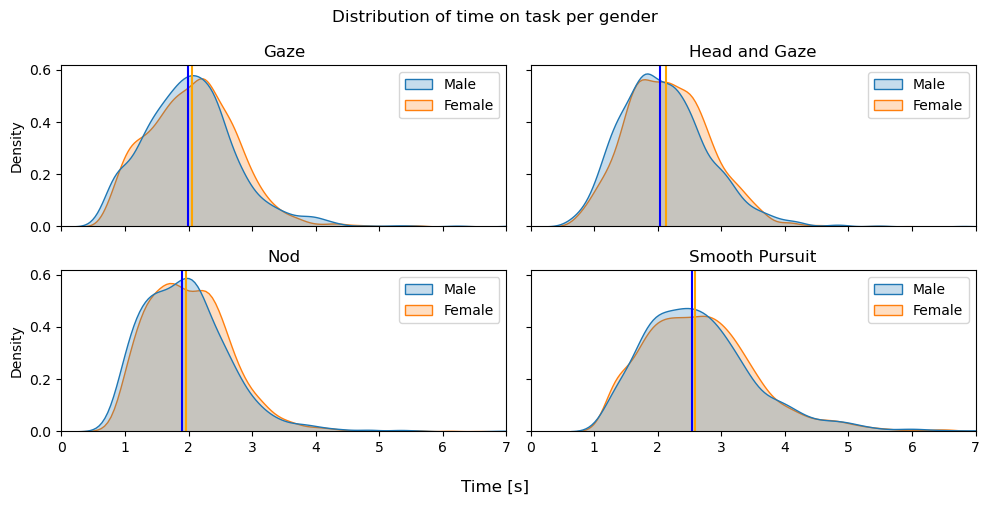

,Method,test_value,p_value,ks_value,ks_p_value,Mean_male,Median_male,Std_male,Nobs_male,Mean_female,Median_female,Std_female,Nobs_female
0,gaze,2427180.5,0.016778,0.049543,0.009481,2.030786,1.9986,0.749060,1693,2.060396,2.0617,0.697538,2993
1,headAndGaze,2551422.0,0.000059,0.059150,0.000784,2.102892,2.0320,0.696512,1700,2.170337,2.1319,0.675300,3226
2,nod,2574466.5,0.000310,0.060500,0.000509,1.957570,1.8970,0.722464,1749,2.012115,1.9540,0.679389,3139
3,smoothPursuit,1778198.0,0.333903,0.036944,0.163771,2.663647,2.5428,0.928184,1382,2.674316,2.5870,0.905218,2622


,Method,t_time,p_time,t_points,p_points,t_incorrects,p_incorrects
0,gaze,2427180.5,0.016778,-0.288485,0.772976,0.012751,0.989827
1,headAndGaze,2551422.0,0.000059,0.844900,0.398167,0.521388,0.602096
2,nod,2574466.5,0.000310,0.810342,0.417744,1.396834,0.162463
3,smoothPursuit,1778198.0,0.333903,0.844085,0.398622,0.816711,0.414094


In [47]:
# pref method vs not pref

import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import ttest_ind, ranksums
from scipy import stats
res = list()
res_stats = list()
fig, axs = plt.subplots(2, 2, figsize=(10, 5), sharex=True, sharey=True)
axs = [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
for i, cond in enumerate(Recording.conditions):
    summary_rounds = {"Female": recs.get_summarized_rounds(cond, "Female"),
                      "Male": recs.get_summarized_rounds(cond, "Male")}
    timeOnTask = {"Male": list(), "Female": list()}
    points = {"Male": list(), "Female": list()}
    incorrects = {"Male": list(), "Female": list()}
    for g in ["Male", "Female"]:
        for p in summary_rounds[g]:
            for r in summary_rounds[g][p]:
                timeOnTask[g] += [x for x in summary_rounds[g][p][r]["TimeOnTask"] if x < 10]
                points[g].append(summary_rounds[g][p][r]["Points"])
                incorrects[g].append(summary_rounds[g][p][r]["Incorrect"])
    
    test_time = stats.mannwhitneyu(timeOnTask["Male"], timeOnTask["Female"])
    ks_time = stats.ks_2samp(timeOnTask["Male"], timeOnTask["Female"])
    ttest_points = stats.ranksums(points["Male"], points["Female"])
    ttest_incorrects = stats.ranksums(incorrects["Male"], incorrects["Female"])
    sns.kdeplot(timeOnTask, fill=True, multiple="layer", common_norm=False, ax=axs[i])
    axs[i].axvline(np.median(timeOnTask["Male"]), c="blue")
    axs[i].axvline(np.median(timeOnTask["Female"]), c="orange")
    axs[i].set_title(rename_methods[cond])
    axs[i].set_xlim([0, 7])
    # fig, (ax_time, ax_points, ax_incorrect) = plt.subplots(3)
    # sns.kdeplot(timeOnTask, fill=True, multiple="layer", common_norm=False, ax=ax_time)
    # ax_time.set_title("Time on Task")
    # sns.kdeplot(points, fill=True, multiple="layer", common_norm=False, ax=ax_points)
    # ax_points.set_title("Points")
    # sns.kdeplot(incorrects, fill=True, multiple="layer", common_norm=False, ax=ax_incorrect)
    # ax_incorrect.set_title("Incorrects")
    # fig.suptitle(cond)
    # fig.tight_layout()
    # plt.show()
    res.append({
        "Method": cond,
        "t_time": test_time.statistic,
        "p_time": test_time.pvalue,
        "t_points": ttest_points.statistic,
        "p_points": ttest_points.pvalue,
        "t_incorrects": ttest_incorrects.statistic,
        "p_incorrects": ttest_incorrects.pvalue 
    })
    res_stats.append({
        "Method": cond,
        "test_value": test_time.statistic,
        "p_value": test_time.pvalue,
        "ks_value": ks_time.statistic,
        "ks_p_value": ks_time.pvalue,
        "Mean_male": np.mean(timeOnTask["Male"]),
        "Median_male": np.median(timeOnTask["Male"]),
        "Std_male": np.std(timeOnTask["Male"]),
        "Nobs_male": len(timeOnTask["Male"]),
        "Mean_female": np.mean(timeOnTask["Female"]),
        "Median_female": np.median(timeOnTask["Female"]),
        "Std_female": np.std(timeOnTask["Female"]),
        "Nobs_female": len(timeOnTask["Female"])
    })
fig.suptitle("Distribution of time on task per gender")
fig.supxlabel("Time [s]")
fig.tight_layout()
plt.savefig("Pictures/timeGender.png")
plt.show()
display(pd.DataFrame(res_stats))
display(pd.DataFrame(res))

In [48]:
rec.answers

,gaze,headAndGaze,nod,smoothPursuit
tlx_MentalDemand,30,40,10,70
tlx_PhysicalDemand,0,30,70,10
tlx_TemporalDemand,30,60,60,60
tlx_Performance,20,10,30,30
tlx_Effort,20,40,60,60
tlx_Frustration,20,10,60,30
parameters,30,70,60,60


In [49]:
# pref method vs not pref questionnaire
import pandas as pd
import numpy as np
from scipy import stats

features = ["Points", "Time", "Incorrects"]

# results = {x: {"Preferred": {x: list() for x in features}, 
#                "Not preferred": {x: list() for x in features}} 
#                for x in Recording.conditions}

rename_dict = {
    'gaze': 'Gaze',
    'headAndGaze': 'Head and gaze',
    'nod': 'Nod',
    'smoothPursuit': 'Smooth pursuit'
}

results = list()

for rec in recs:
    for cond in Recording.conditions:
        final_rounds = rec.get_final_rounds(cond)
        summary_rounds = rec.summarize_rounds(cond)
        new_result = {
                "Preferred method": "Yes" if rec.pref_method == rename_dict[cond] else "No",
                "Method": rename_dict[cond]
                }
        for q, row in rec.answers.iterrows():
            new_result[q.replace("tlx_", "")] = row[cond]
        results.append(new_result)

res = pd.DataFrame(results)
test_results = list()
pvalues = list()
index_pvalues = list()
questions = ["MentalDemand", "PhysicalDemand", "TemporalDemand", "Performance", "Effort", "Frustration"]
for cond in Recording.conditions:
    res_cond = res.loc[res["Method"]==rename_dict[cond]]
    test_p = {"Method": cond}
    for q in questions:
        values_pref = res_cond.loc[res_cond["Preferred method"] == "Yes", q].to_numpy()
        values_noPref = res_cond.loc[res_cond["Preferred method"] == "No", q].to_numpy()
        p = stats.mannwhitneyu(values_pref, values_noPref).pvalue
        test_p[q] = p
        pvalues.append(p)
        index_pvalues.append([cond, q])
    test_results.append(test_p)
display(pd.DataFrame(test_results))

pvalues = multipletests(pvalues, method='bonferroni')[1]
res_corrected = pd.DataFrame([{
    "Method": m, 
    "Question": q,
    "p": p
} for (m, q), p in zip(index_pvalues, pvalues)])
display(res_corrected.pivot(index="Method", columns="Question", values="p"))
    

,Method,MentalDemand,PhysicalDemand,TemporalDemand,Performance,Effort,Frustration
0,gaze,0.037792,0.042599,0.707096,0.259836,0.982914,0.101168
1,headAndGaze,0.735166,0.245289,0.277061,0.057596,0.332255,0.152906
2,nod,0.017504,0.102309,0.209416,0.003494,0.969326,0.412640
3,smoothPursuit,0.646747,0.068282,0.334513,0.010029,0.025846,0.058895


Question,Effort,Frustration,MentalDemand,Performance,PhysicalDemand,TemporalDemand
Method,,,,,,
gaze,1.000000,1.0,0.906996,1.000000,1.0,1.0
headAndGaze,1.000000,1.0,1.000000,1.000000,1.0,1.0
nod,1.000000,1.0,0.420099,0.083845,1.0,1.0
smoothPursuit,0.620304,1.0,1.000000,0.240707,1.0,1.0
